# Lead Scoring Case Study

<font color='green'> Problem statement :</font>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

<font color='brown'>  **Goals and Objectives** :</font>

There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

There are some more problems presented by the company which the model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well.

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading and Cleaning the data


In [4]:
# Import lead dataset
lead_df = pd.read_csv("C:\\Users\Admin\Desktop\Lead Scoring case study\Lead Scoring Assignment\Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Inspection

In [5]:
# Checking the shape of the data
lead_df.shape

(9240, 37)

In [6]:
# Inspecting on the columns of the dataset
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Checking on the datatypes of variables and the non- null counts
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There are null values present in the data which need to be treated accordingly

In [8]:
# Describing Data
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Checking the number of missing values in each in variable
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Cleaning the dataframe

In [10]:
# Replacing 'Select' with Nan
lead_df = lead_df.replace('Select', np.nan)

In [11]:
# To check on the null percentage in all columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

We can notice that in few columns there are high percentage of missing values. Deciding on dropping the columns with more than 40% missing values

In [12]:
# Dropping columns where missing values are more than 40%
lead_df = lead_df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

In [13]:
# To check on the null percentage after dropping the above columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

### Treating the indivial columns missing values 
 1. 'Specialization' - 37% missing value


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

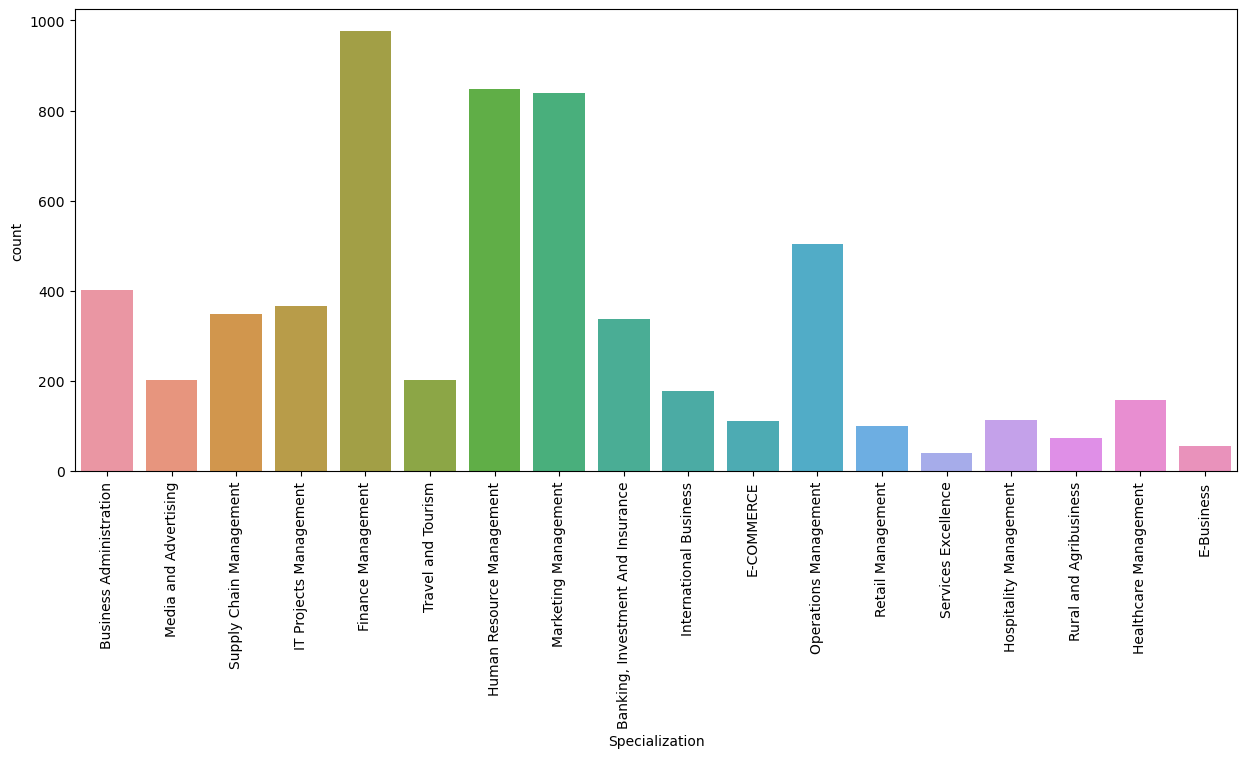

In [14]:
plt.figure(figsize=(15,6))
sns.countplot(lead_df['Specialization'])
plt.xticks(rotation=90)

 The missing value of 37% in specialization column might be due to the lead might have left unattended as they might not have any specialization or might be a student. We can replace missing value with 'others'

In [15]:
lead_df['Specialization'] = lead_df['Specialization'].replace(np.nan,'Others')

2 - 'What is your current occupation'- 29% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

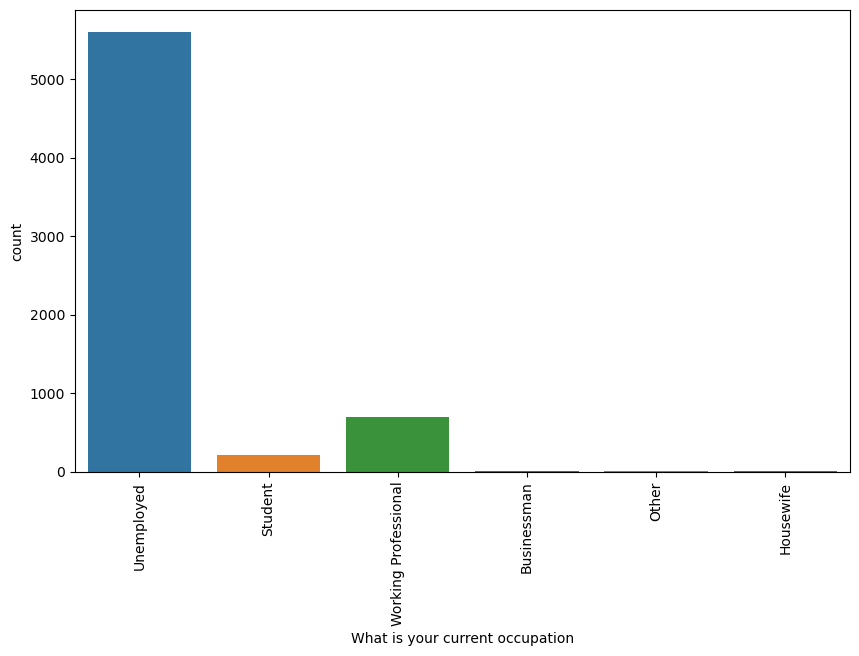

In [16]:
# Visualizing the column:
plt.figure(figsize=(10,6))
sns.countplot(lead_df['What is your current occupation'])
plt.xticks(rotation=90)

In [17]:
# Finding the percentage of all categories in this column
round(lead_df['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

As seen above, 85% of value is under unemployed, we can replace the missing values with unemployed

In [18]:
# Imputing the missing values of 'What is your current occupation' with 'unemployed'
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan,'Unemployed')

3- 'What matters most to you in choosing a course'-29% missing values

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

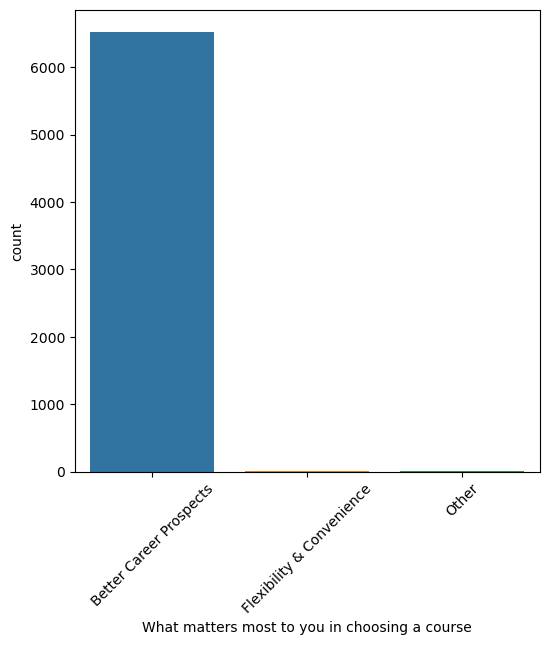

In [19]:
# Visualizing the column:
plt.figure(figsize=(6,6))
sns.countplot(lead_df['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [20]:
# Finding the percentage of all categories in this column
round(lead_df['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

We can notice that the column is highly skewed,so lets drop this column

In [21]:
# Dropping this column as the values are highly skewed
lead_df = lead_df.drop('What matters most to you in choosing a course',axis=1)

4- 'Tags'-36% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

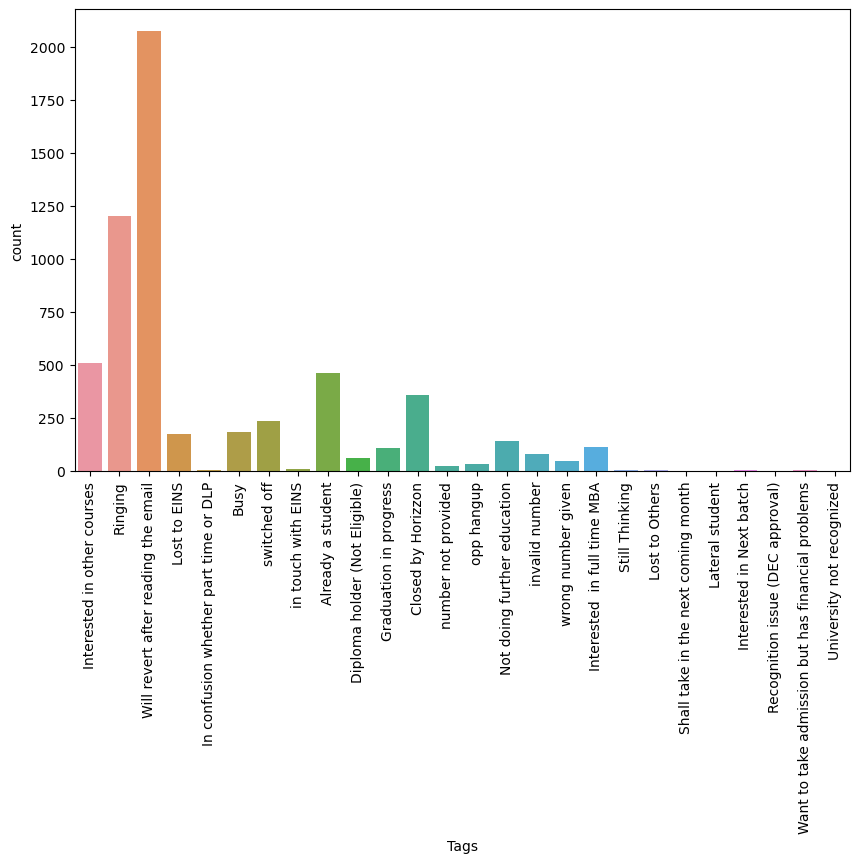

In [22]:
# Visualizing the column:
plt.figure(figsize=(10,6))
sns.countplot(lead_df['Tags'])
plt.xticks(rotation=90)

From the above plot, we can notice that the value is high for 'will revert after reading the email'. Therefore we can replace missing values in this column with 'will revert after reading the email'. 

In [23]:
# Imputing the missing values of 'Tags' with 'Will revert after reading the email'
lead_df['Tags'] = lead_df['Tags'].replace(np.nan,'Will revert after reading the email')

5- 'Country'-27% missing values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

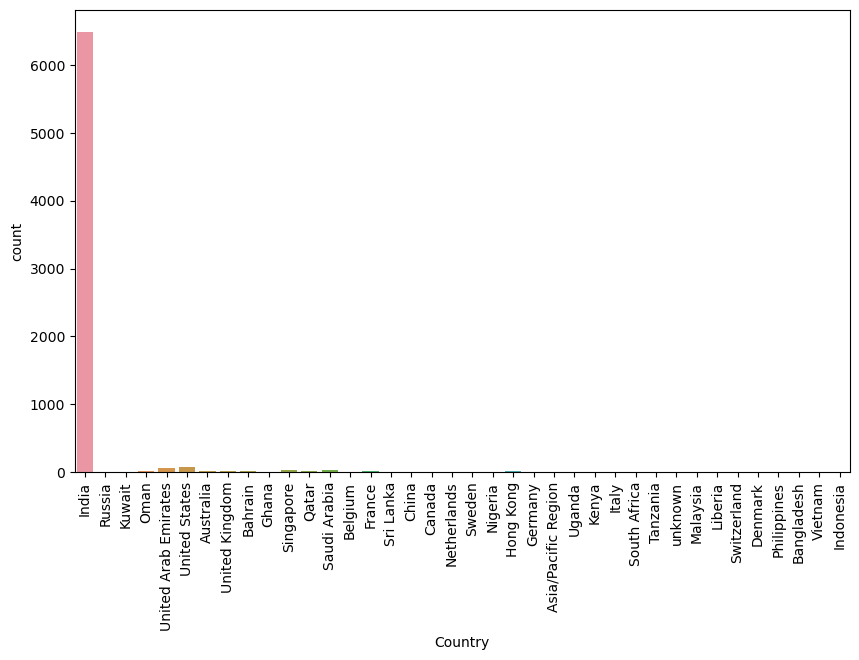

In [24]:
# Visualizing the column:
plt.figure(figsize=(10,6))
sns.countplot(lead_df['Country'])
plt.xticks(rotation=90)

From the above plot we can notice that most of the leads are from India , so we can impute the missing values in  this column with India.

In [25]:
# Imputing the missing values of 'Country' with 'India'
lead_df['Country'] = lead_df['Country'].replace(np.nan,'India')

6- 'City'-40% missing values

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

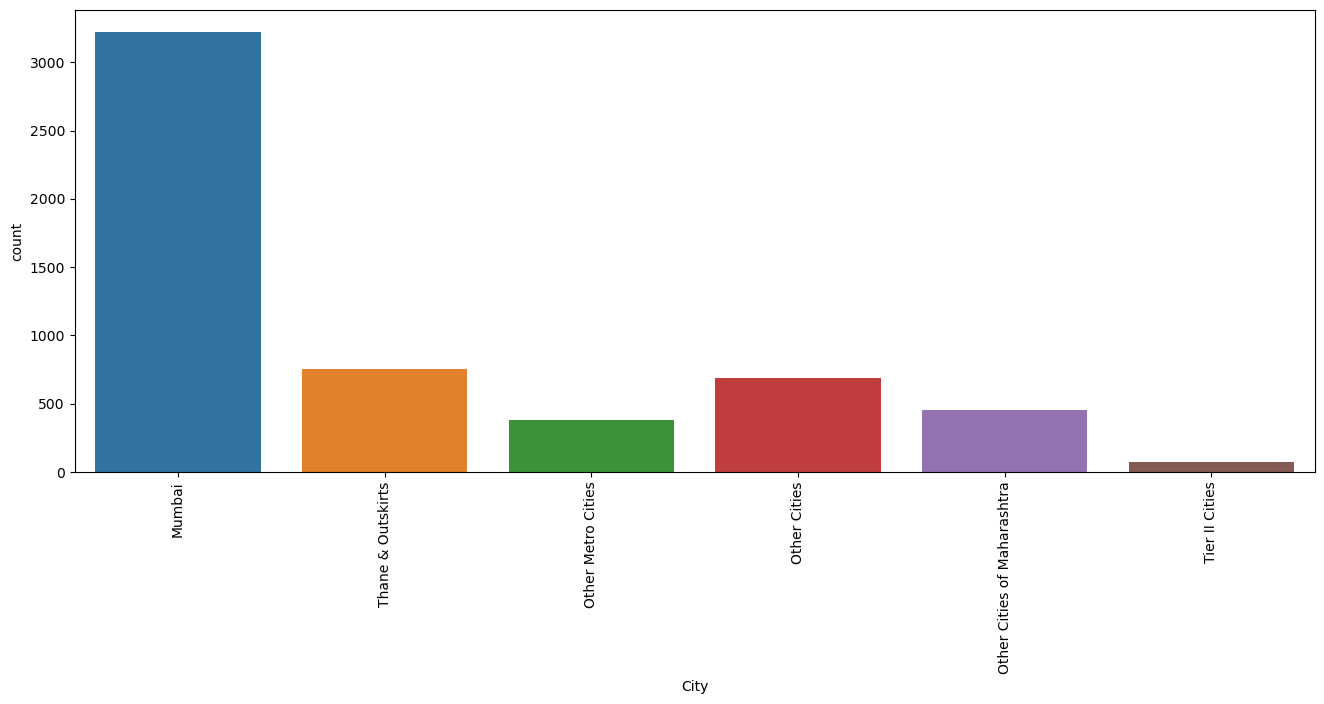

In [26]:
# Visualizing the column:
plt.figure(figsize=(16,6))
sns.countplot(lead_df['City'])
plt.xticks(rotation=90)

In [27]:
# Finding the percentage of all cities in this column
round(lead_df['City'].value_counts(normalize=True),2)*100

Mumbai                         58.0
Thane & Outskirts              13.0
Other Cities                   12.0
Other Cities of Maharashtra     8.0
Other Metro Cities              7.0
Tier II Cities                  1.0
Name: City, dtype: float64

We can impute missing values in this column with 'Mumbai'

In [28]:
# Imputing the missing values of 'City' with 'Mumbai'
lead_df['City'] = lead_df['City'].replace(np.nan,'Mumbai')

In [29]:
# After imputing the missing values, finding out the null percentage of all the columns
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

In [30]:
# Dropping the columns with null values as the above chart shows that it is less than 2% 
lead_df.dropna(inplace=True)

Now again rechecking on the null percentage of the columns after dropping the columns

In [31]:
round(lead_df.isnull().sum()/len(lead_df.index),2)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                 

Now, we dont find any missing values in the dataset.

In [32]:
lead_df.shape

(9074, 29)

# Exploratory data Analysis
 **'Converted' -- The target variable**

In [33]:
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

The Conversion rate of lead is 38%

<font color='green'> **Lead Origin**</font>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

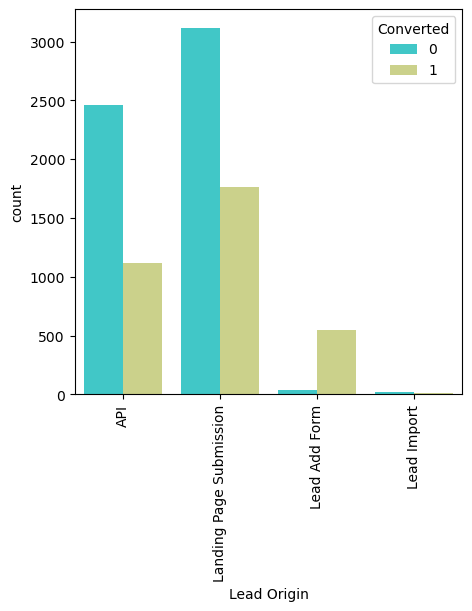

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Lead Origin",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Insights:

    1. Lead count of API and Landing Page Submission are considerable and the conversion rate is upto about 36%.
    2. Lead Add form conversion rate is around 92%
    3. Lead import and Lead Add Form count is less.

### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

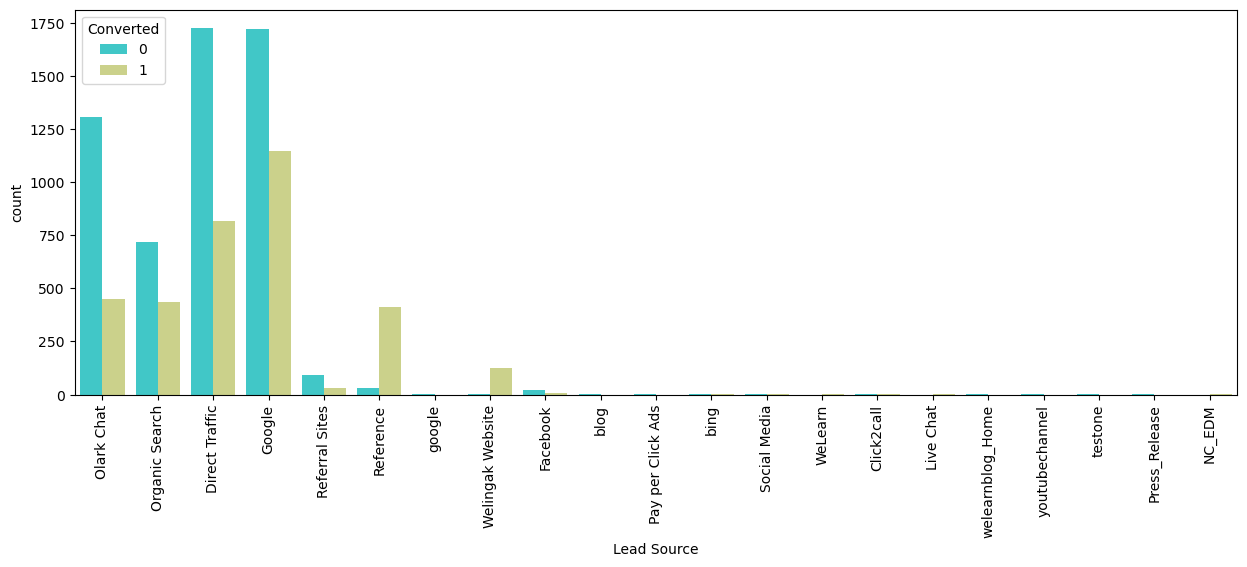

In [35]:
plt.figure(figsize=(15,5))
sns.countplot(x ="Lead Source",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

In [36]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'],'Google')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'Social Media'),
  Text(12, 0, 'WeLearn'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'Live Chat'),
  Text(15, 0, 'welearnblog_Home'),
  Text(16, 0, 'youtubechannel'),
  Text(17, 0, 'testone'),
  Text(18, 0, 'Press_Release'),
  Text(19, 0, 'NC_EDM')])

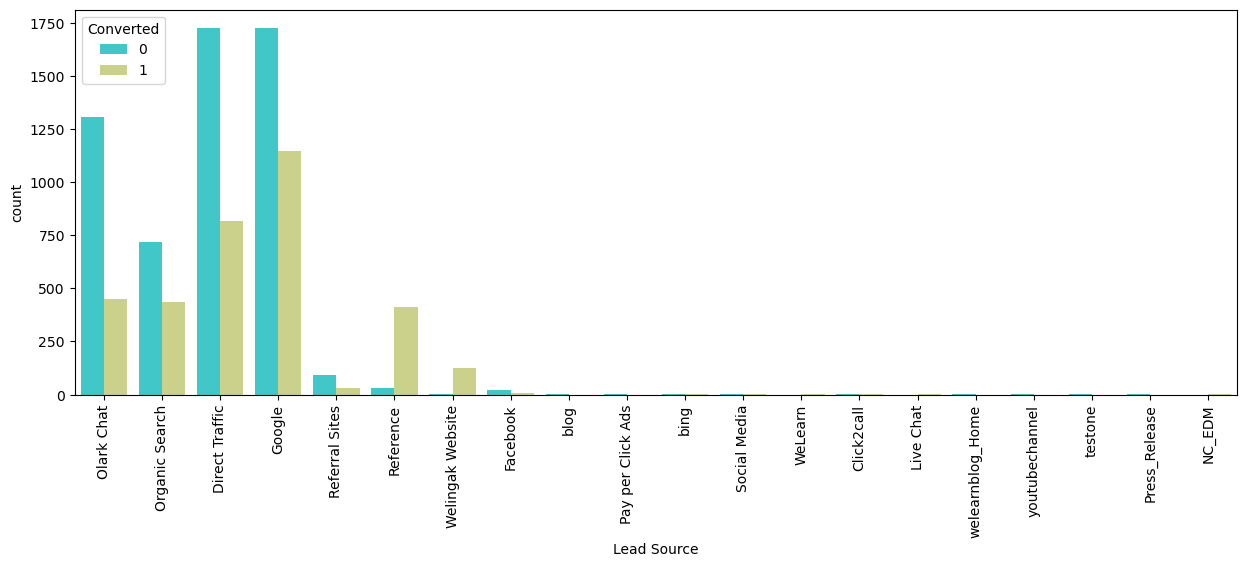

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(x ="Lead Source",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Insights:

    1. More leads are generated from Direct Traffic and Google
    2. Leads generated from Olark Chat and Organic Search are also to be considered
    3. Conversion rate of Reference and Welingak Website is high.

### Do not Email

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

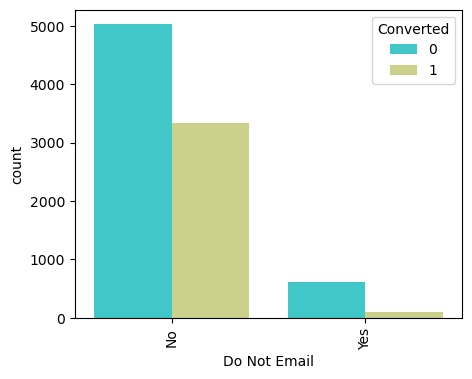

In [38]:
plt.figure(figsize=(5,4))
sns.countplot(x ="Do Not Email",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Do Not Call

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

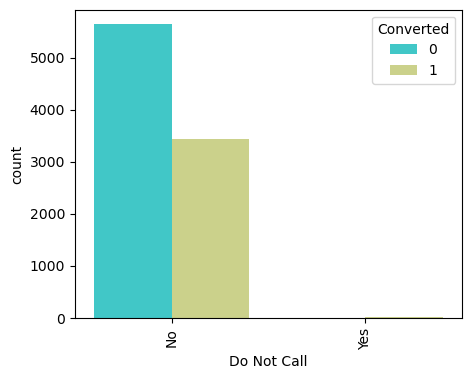

In [39]:
plt.figure(figsize=(5,4))
sns.countplot(x ="Do Not Call",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Cannot draw any inference from Do Not Call and Do Not Email Columns

## TotalVisits

In [40]:
lead_df['TotalVisits'].describe(percentiles=[0.05,0.25,0.5,0.75,0.90,0.95,0.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

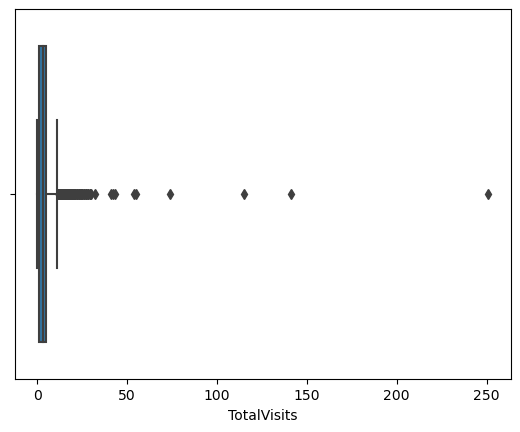

In [41]:
sns.boxplot(lead_df['TotalVisits'])

We can notice the outliers in the data and will cap to 95% of the values

In [42]:
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits']<=percentiles[0]]=percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits']>=percentiles[1]]=percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

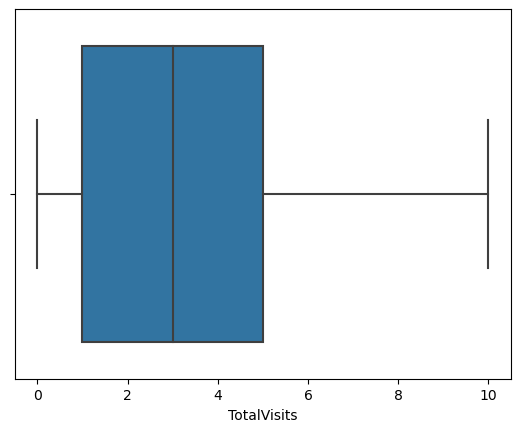

In [43]:
# Visualizing the TotalVisits
sns.boxplot(lead_df['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

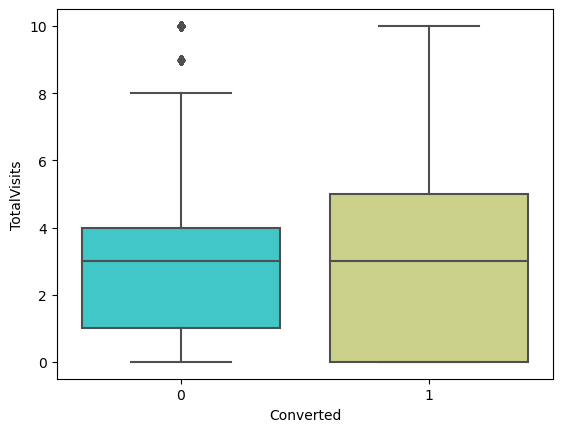

In [44]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df,palette = 'rainbow' )

We cannot conclude on the basis of median of the Convertion of TotalVisits as the median for converted and not converted leads are same.

### Total Time Spent on Website

In [45]:
lead_df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

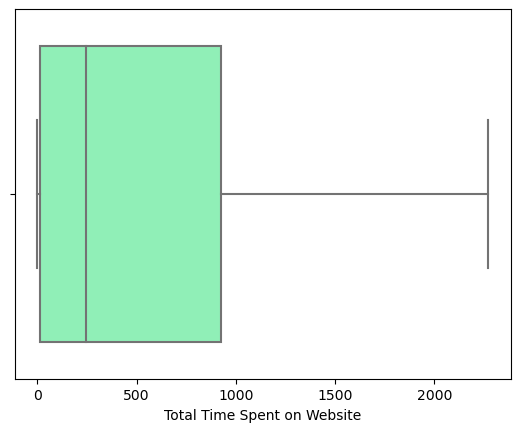

In [46]:
sns.boxplot(lead_df['Total Time Spent on Website'],palette = 'rainbow')

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

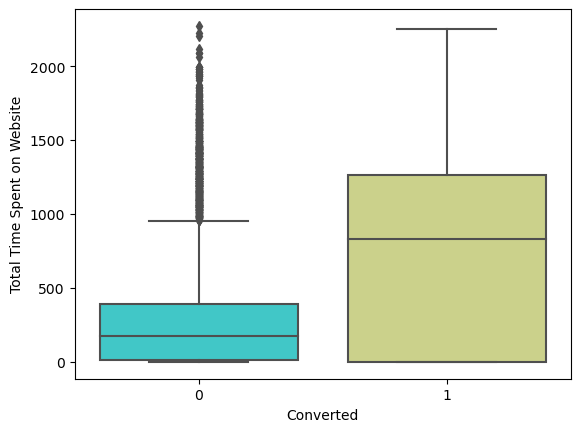

In [47]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df,palette = 'rainbow' )

Insights: 

Leads who are spending more time on Website are more likely to be converted

### Page Views Per Visit

In [48]:
lead_df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

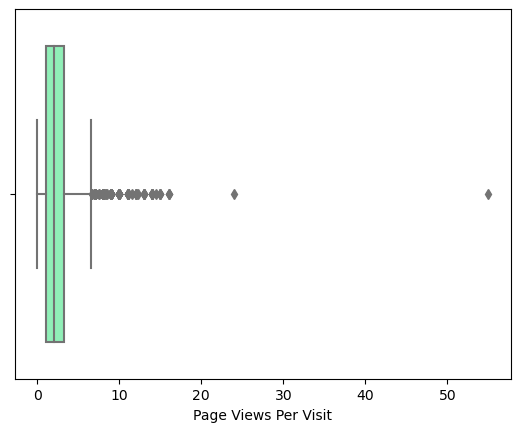

In [49]:
sns.boxplot(lead_df['Page Views Per Visit'], palette = 'rainbow')

We can notice the outliers in the data and will cap to 95% of the values

In [50]:
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit']>=percentiles[1]]=percentiles[1]

<AxesSubplot:xlabel='Page Views Per Visit'>

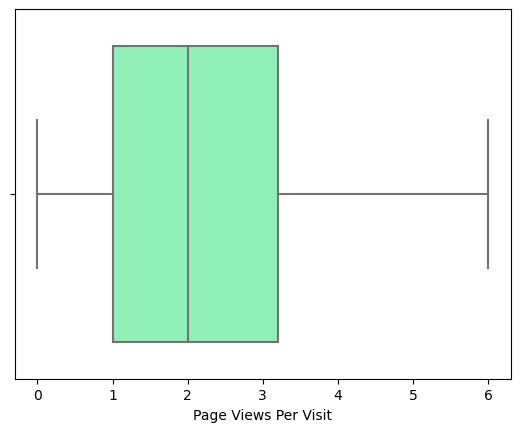

In [51]:
# Visualizing Again
sns.boxplot(lead_df['Page Views Per Visit'], palette = 'rainbow')

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

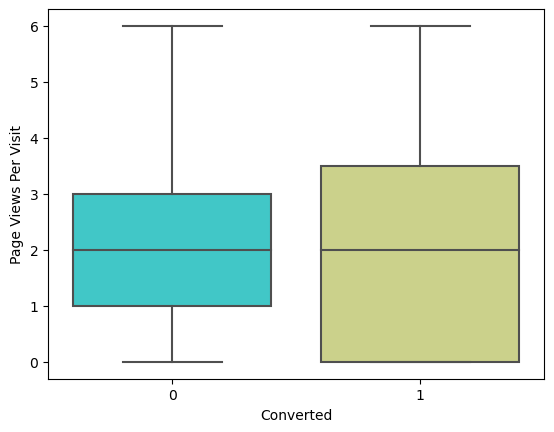

In [52]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df,palette = 'rainbow' )

Again here we cannot draw any insights from Page Views Per visit

### Last Activity

In [53]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

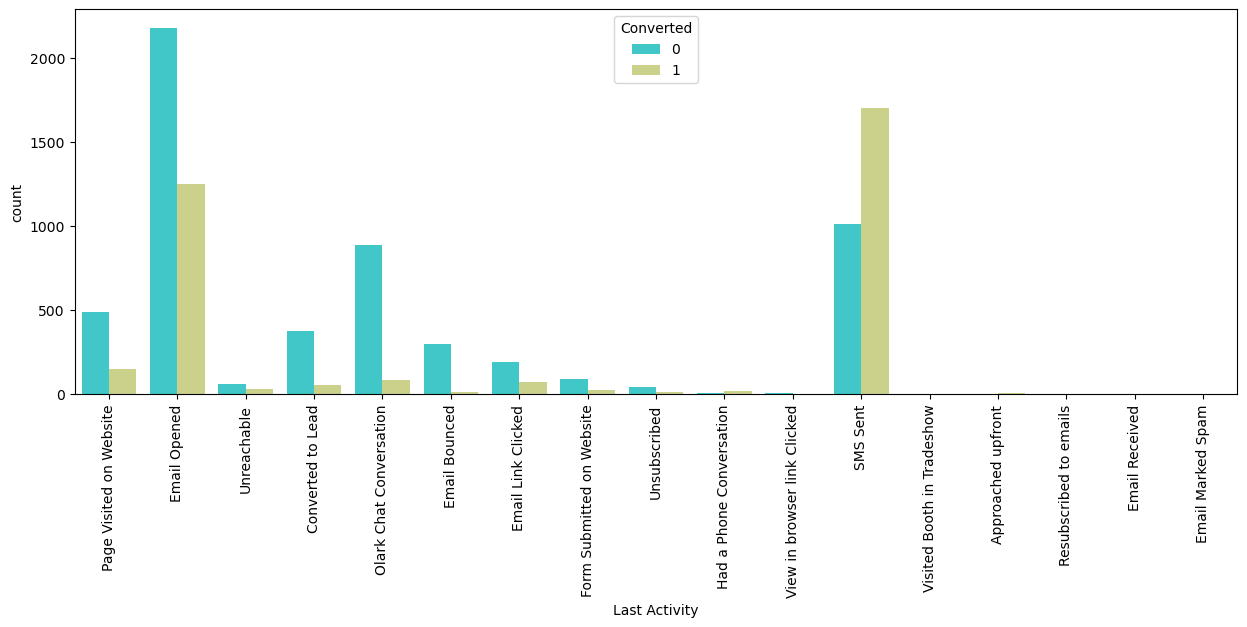

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(x ="Last Activity",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Insights:
    
    1. Approx 40% of leads have opened the email as last activity
    2. Conversion rate of leads with last activity as SMS sent is aroung 62% 

### Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

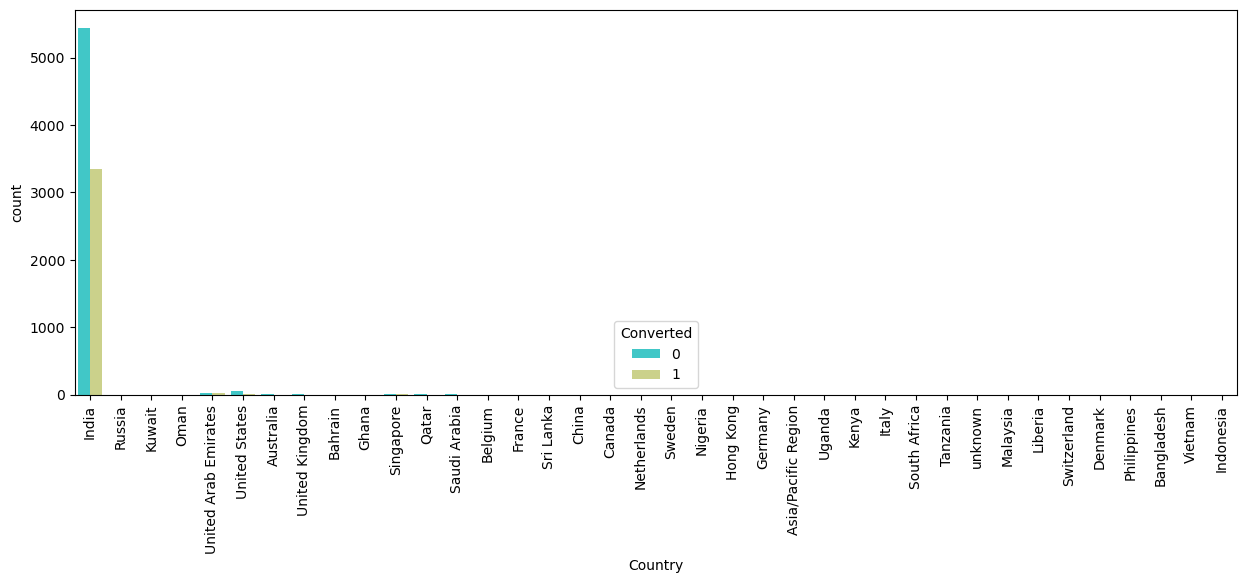

In [55]:
plt.figure(figsize=(15,5))
sns.countplot(x ="Country",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Others'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

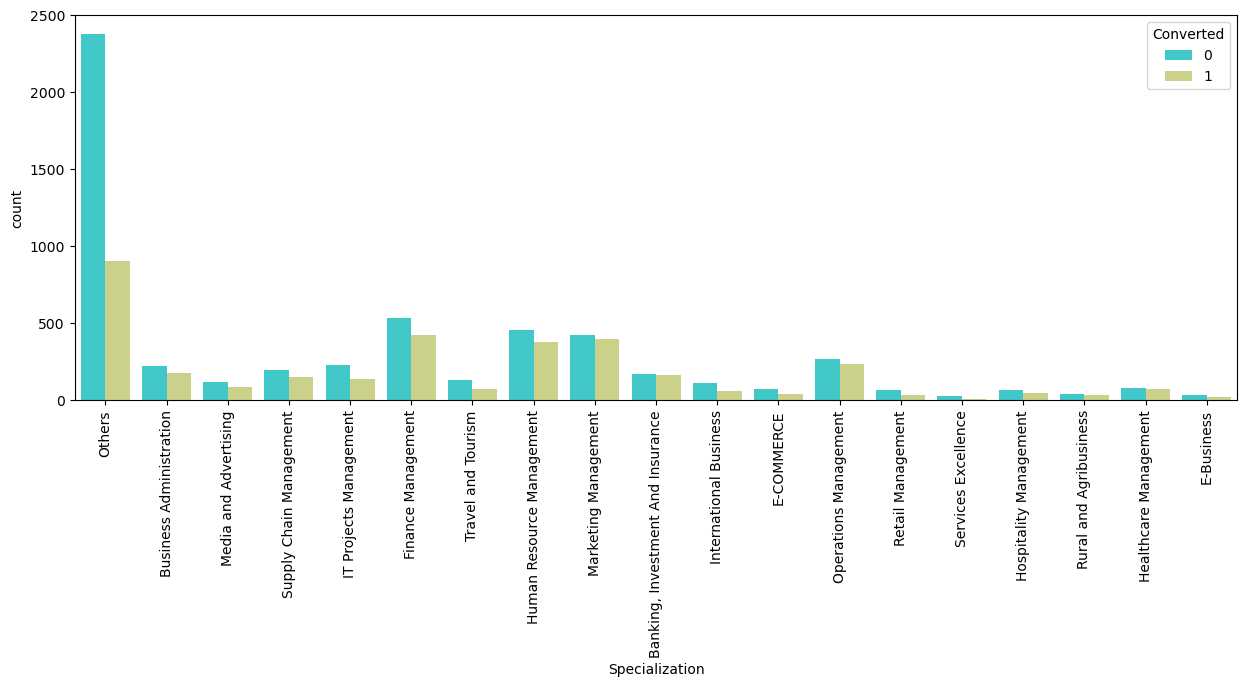

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(x ="Specialization",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Here we must focus on good conversion rated specializations.

### What is your current occupation

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

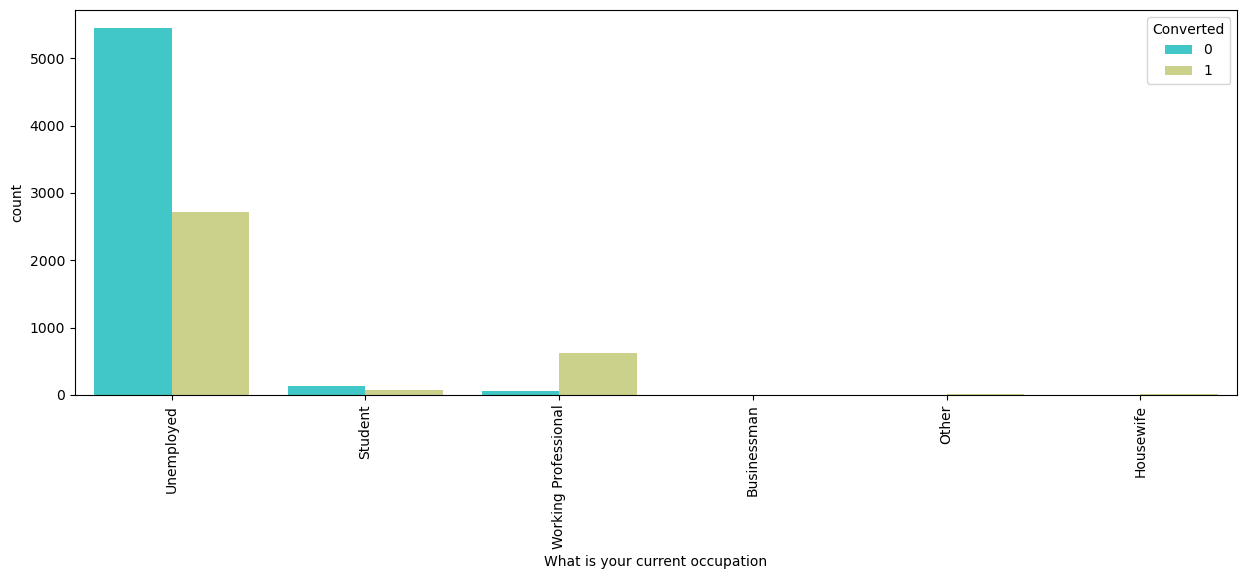

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x ="What is your current occupation",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Insights:
    
    1. Unemployed leads are more in number and the conversion rate is upto 35%.
    2. Highly converted leads are working professionals and have every possibility of joining the course.

### Search

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

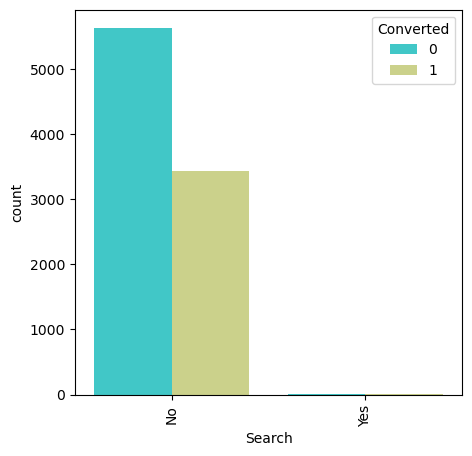

In [58]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Search",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Magazine

(array([0]), [Text(0, 0, 'No')])

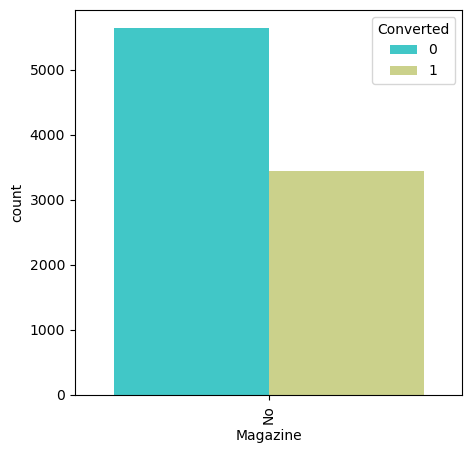

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Magazine",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Newspaper Article

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

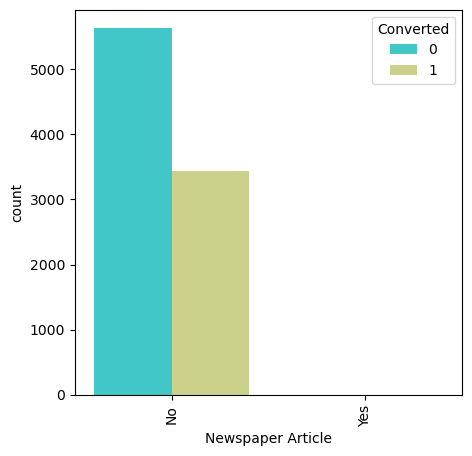

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Newspaper Article",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### X Education Forums

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

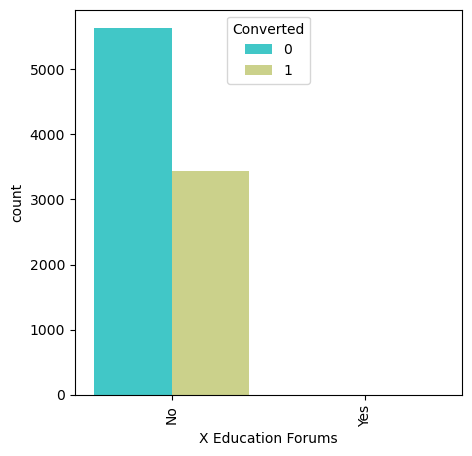

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(x ="X Education Forums",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Newspaper

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

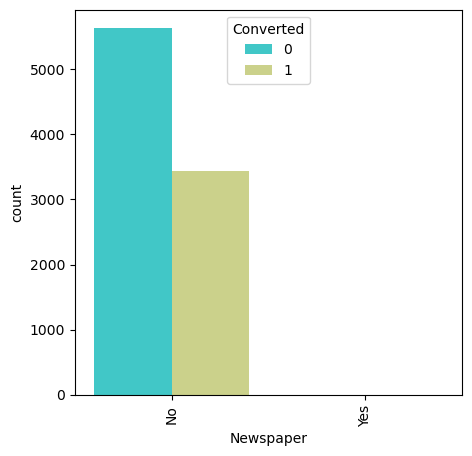

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Newspaper",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Digital Advertisement

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

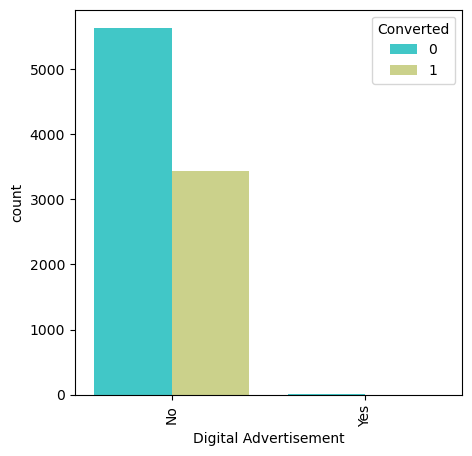

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Digital Advertisement",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Through Recommendations

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

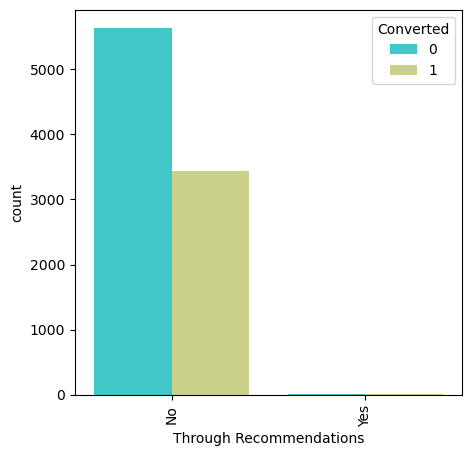

In [64]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Through Recommendations",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Receive More Updates About Our Courses

(array([0]), [Text(0, 0, 'No')])

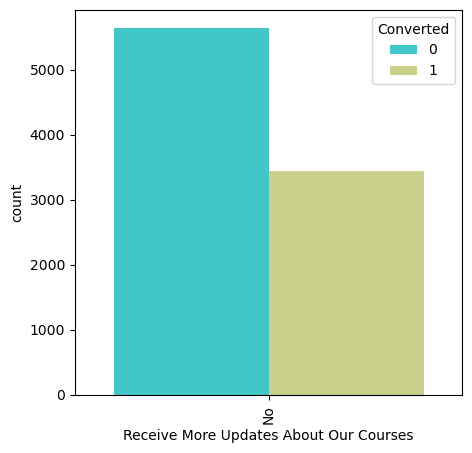

In [65]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Receive More Updates About Our Courses",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'number not provided'),
  Text(12, 0, 'opp hangup'),
  Text(13, 0, 'Closed by Horizzon'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

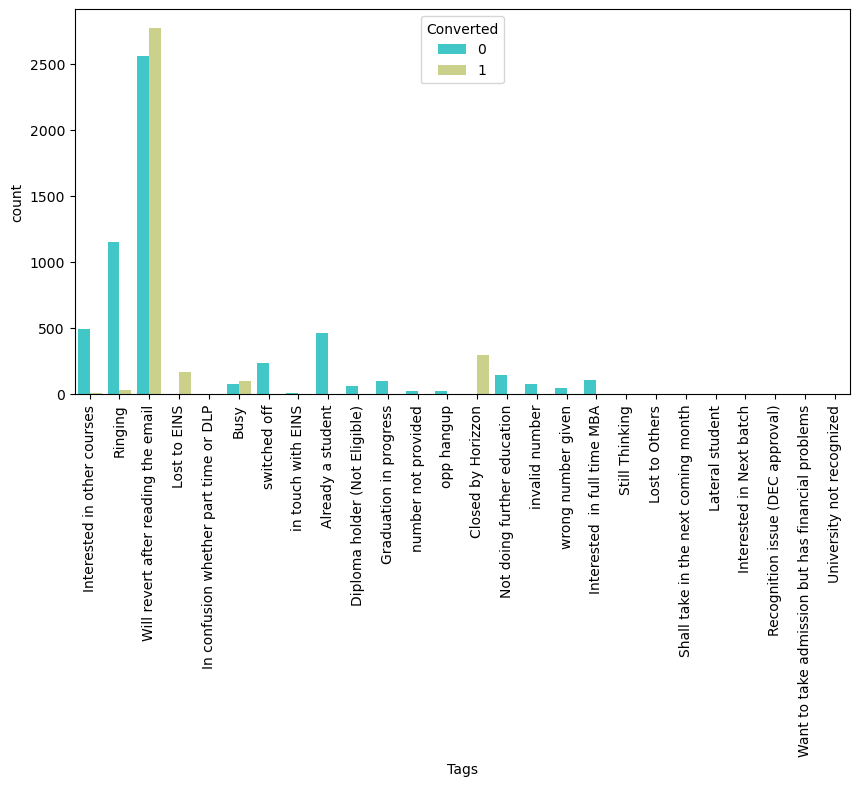

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x ="Tags",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Unable to draw any inferences from above few  columns

### Update me on Supply Chain Content

(array([0]), [Text(0, 0, 'No')])

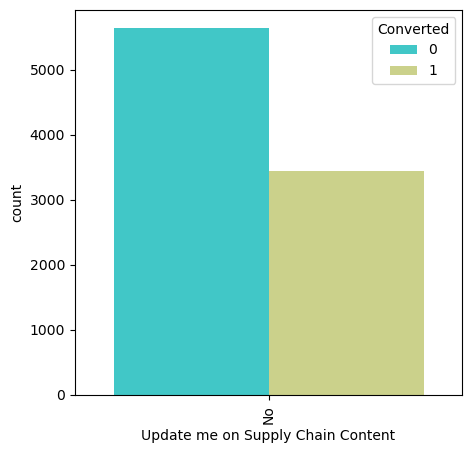

In [67]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Update me on Supply Chain Content",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Get updates on DM Content

(array([0]), [Text(0, 0, 'No')])

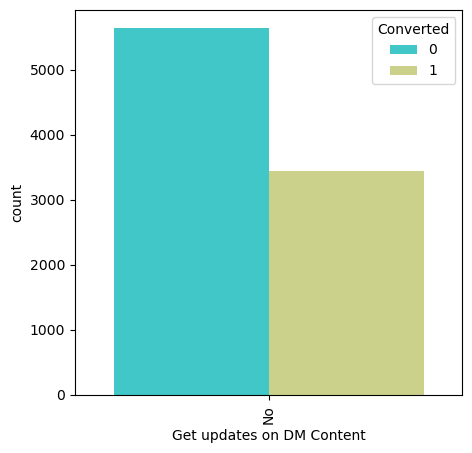

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(x ="Get updates on DM Content",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### City

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

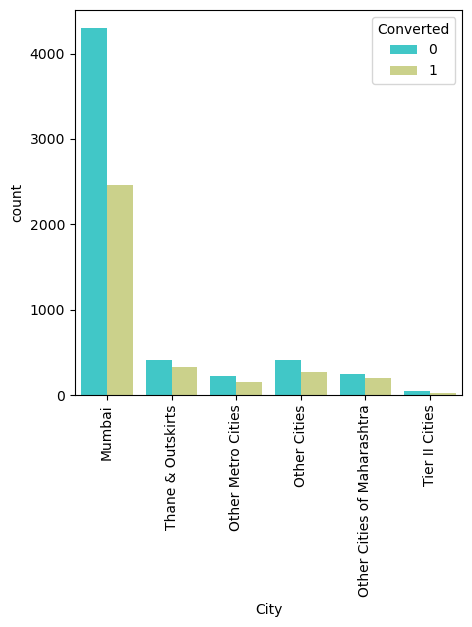

In [69]:
plt.figure(figsize=(5,5))
sns.countplot(x ="City",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

From the above we can notice that most of the leads are from Mumbai city

### I agree to pay the amount through cheque

(array([0]), [Text(0, 0, 'No')])

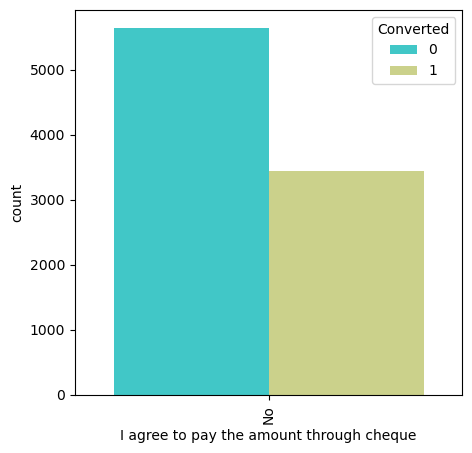

In [70]:
plt.figure(figsize=(5,5))
sns.countplot(x ="I agree to pay the amount through cheque",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### A free copy of Mastering The Interview

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

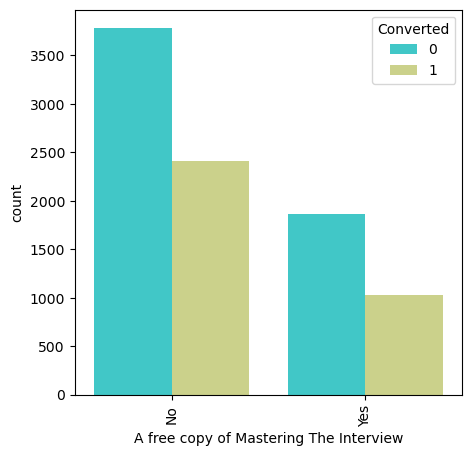

In [71]:
plt.figure(figsize=(5,5))
sns.countplot(x = "A free copy of Mastering The Interview",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

### Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

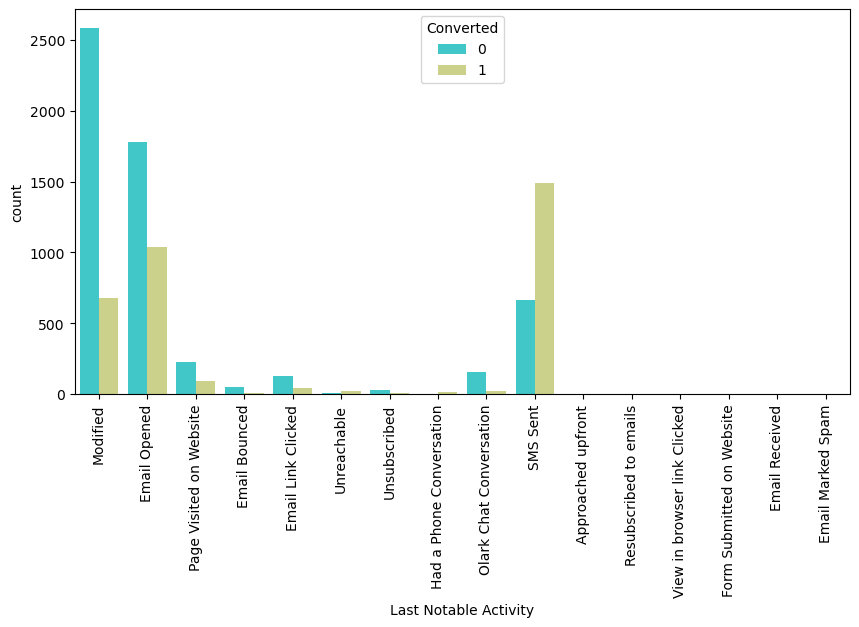

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Notable Activity",hue = "Converted",data = lead_df,palette = 'rainbow')
plt.xticks(rotation=90)

Insights: 1. Leads with SMS sent as the Last Notable Activity has the high converison rate.

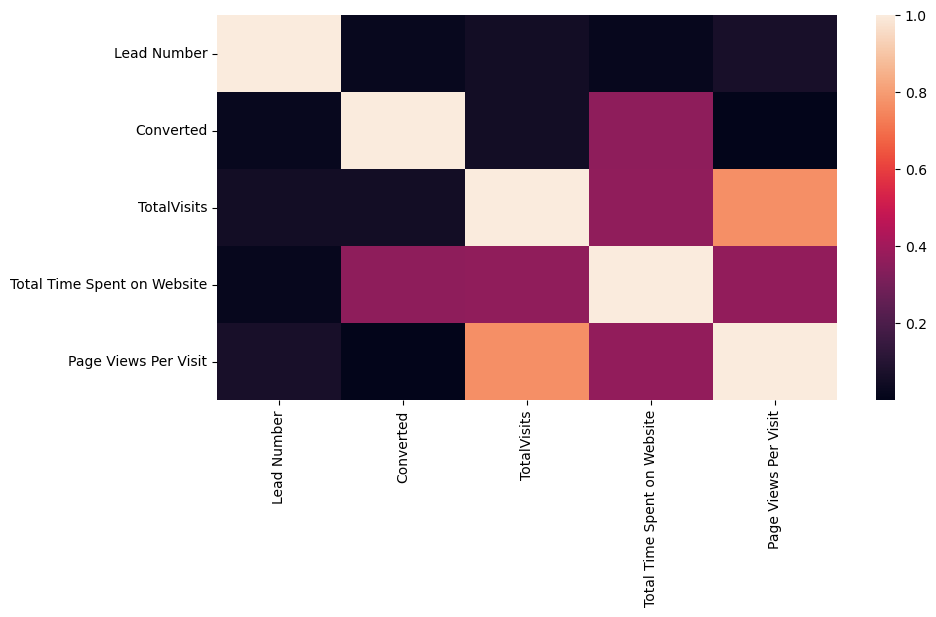

In [73]:
# Checking the correlation among variables
plt.figure(figsize=(10,5))
sns.heatmap(lead_df.corr())
plt.show()

From the above analysis it is understandable that there are element that have little data and will be of less relevance to our analysis.

### Dropping the columns which are not adding any value nor providing any useful information for model.

In [75]:
lead_df = lead_df.drop(['Lead Number','Country','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Tags','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [76]:
lead_df.shape

(9074, 14)

In [77]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   object 
 4   Do Not Call                      9074 non-null   object 
 5   Converted                        9074 non-null   int64  
 6   TotalVisits                      9074 non-null   float64
 7   Total Time Spent on Website      9074 non-null   int64  
 8   Page Views Per Visit             9074 non-null   float64
 9   Last Activity                    9074 non-null   object 
 10  Specialization                   9074 non-null   object 
 11  What is your current occupation  9074 non-null   object 
 12  City                

## DATA PREPARATION

Converting binary variables YES or No to 1 or 0

In [78]:
var = ['Do Not Email','Do Not Call']

def binary_map(x):
    return x.map({"Yes":1,"No":0})
lead_df[var] = lead_df[var].apply(binary_map)

Categorical columns- To create dummy variables

In [79]:
dummy_variables = pd.get_dummies(lead_df[['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City','Last Notable Activity']],drop_first=True)
dummy_variables.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Concatinating dummy variables to lead_df dataframe

In [80]:
lead_df = pd.concat([lead_df,dummy_variables],axis = 1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


Dropping the columns for which dummy are created

In [81]:
lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','City','Last Notable Activity'],axis = 1)

In [82]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the data into train and test data set

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = lead_df.drop(['Prospect ID','Converted'],axis = 1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


 Target Variable y

In [85]:
y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Splitting train and test data

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7, test_size=0.3,random_state = 100)

### To Scale the features

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [88]:
## Conversion Rate of Leads
Converted = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Converted

37.85541106458012

Lead Conversion rate = 38% 

### Feature Selection using RFE

In [89]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logr, step=20)
rfe = rfe.fit(X_train, y_train)

In [90]:
rfe.support_

array([ True,  True, False,  True, False,  True,  True, False,  True,
       False,  True, False, False,  True,  True, False, False,  True,
        True,  True, False,  True, False, False, False, False, False,
        True,  True, False,  True, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False, False,  True, False,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False])

In [91]:
columns = X_train.columns[rfe.support_]
columns

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Marked Spam',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Specialization_Hospitality Management',
       'Specialization_Media and Advertising', 'Specialization_Others',
       'What

## Model Building

#### Model No 1

In [92]:
import statsmodels.api as sm

In [93]:
X_train_sm = sm.add_constant(X_train[columns])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.2
Date:                Sun, 16 Apr 2023   Deviance:                       5120.4
Time:                        14:47:43   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0360      1.176      1.732      0.083      -0.268       4.340
Do Not Email                                            -1.6050      0.223     -7.194      0.000      -2.042      -1.168
Do Not Call                                             21.6212   3.29e+04      0.001      0.999   -6.44e+04    6.44e+04
Total Time Spent on Website                              1.1071      0.041     26.907      0.000       1.026       1.188
Lead Origin_Landing Page Submission                     -1.0194      0.135     -7.542      0.000      -1.284      -0.755
Lead Origin_Lead Add Form                                0.9568      0.926      1.034      0.301      -0.858       2.771
Lead Source_Direct Traffic                              -0.8570      0.400     -2.143      0.032      -1.641      -0.073
Lead Source_Google                                      -0.5735      0.395     -1.454      0.146      -1.347       0.200
Lead Source_Olark Chat                                   0.4524      0.398      1.138      0.255      -0.327       1.232
Lead Source_Organic Search                              -0.7540      0.402     -1.874      0.061      -1.543       0.035
Lead Source_Reference                                    1.7020      0.907      1.876      0.061      -0.076       3.481
Lead Source_Referral Sites                              -0.9173      0.518     -1.770      0.077      -1.933       0.098
Lead Source_Social Media                                 1.0805      1.586      0.681      0.496      -2.027       4.188
Lead Source_Welingak Website                             4.2672      1.142      3.736      0.000       2.029       6.506
Last Activity_Converted to Lead                         -0.9403      0.246     -3.823      0.000      -1.422      -0.458
Last Activity_Email Bounced                             -1.0988      0.647     -1.698      0.089      -2.367       0.169
Last Activity_Email Marked Spam                         10.9720   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
Last Activity_Form Submitted on Website                 -0.5623      0.356     -1.581      0.114      -1.259       0.135
Last Activity_Had a Phone Conversation                   1.9803      1.136      1.743      0.081      -0.247       4.207
Last Activity_Olark Chat Conversation                   -1.2918      0.215     -5.998      0.000      -1.714      -0.870
Last Activity_Page Visited on Website                   -0.3096      0.235     -1.320      0.187      -0.769       0.150
Last Activity_Resubscribed to emails                    11.6188   2.41e+04      0.000      1.000   -4.72e+04    4.72e+04
Last Activity_SMS Sent                                   0

We can notice that the P- Value of 'Last Notable Activity_Resubscribed to emails', so we will drop this column

In [94]:
# Dropping the column 'Last Notable Activity_Resubscribed to emails'
col1 = columns.drop('Last Notable Activity_Resubscribed to emails')

#### Model No 2

In [95]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.2
Date:                Sun, 16 Apr 2023   Deviance:                       5120.4
Time:                        14:47:43   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4095
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0360      1.176      1.732      0.083      -0.268       4.340
Do Not Email                                            -1.6050      0.223     -7.194      0.000      -2.042      -1.168
Do Not Call                                             21.6212   3.29e+04      0.001      0.999   -6.44e+04    6.44e+04
Total Time Spent on Website                              1.1071      0.041     26.907      0.000       1.026       1.188
Lead Origin_Landing Page Submission                     -1.0194      0.135     -7.542      0.000      -1.284      -0.755
Lead Origin_Lead Add Form                                0.9568      0.926      1.034      0.301      -0.858       2.771
Lead Source_Direct Traffic                              -0.8570      0.400     -2.143      0.032      -1.641      -0.073
Lead Source_Google                                      -0.5735      0.395     -1.454      0.146      -1.347       0.200
Lead Source_Olark Chat                                   0.4524      0.398      1.138      0.255      -0.327       1.232
Lead Source_Organic Search                              -0.7540      0.402     -1.874      0.061      -1.543       0.035
Lead Source_Reference                                    1.7020      0.907      1.876      0.061      -0.076       3.481
Lead Source_Referral Sites                              -0.9173      0.518     -1.770      0.077      -1.933       0.098
Lead Source_Social Media                                 1.0805      1.586      0.681      0.496      -2.027       4.188
Lead Source_Welingak Website                             4.2672      1.142      3.736      0.000       2.029       6.506
Last Activity_Converted to Lead                         -0.9403      0.246     -3.823      0.000      -1.422      -0.458
Last Activity_Email Bounced                             -1.0988      0.647     -1.698      0.089      -2.367       0.169
Last Activity_Email Marked Spam                         10.9720   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
Last Activity_Form Submitted on Website                 -0.5623      0.356     -1.581      0.114      -1.259       0.135
Last Activity_Had a Phone Conversation                   1.9803      1.136      1.743      0.081      -0.247       4.207
Last Activity_Olark Chat Conversation                   -1.2918      0.215     -5.998      0.000      -1.714      -0.870
Last Activity_Page Visited on Website                   -0.3096      0.235     -1.320      0.187      -0.769       0.150
Last Activity_Resubscribed to emails                    23.2376   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Last Activity_SMS Sent                                   0

Here the P- Value of 'Last Activity_Resubscribed to emails' is high, we will drop this column

In [96]:
# Dropping the column 'Last Activity_Resubscribed to emails'
col1 = col1.drop('Last Activity_Resubscribed to emails')

#### Model No 3

In [97]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.1
Date:                Sun, 16 Apr 2023   Deviance:                       5122.2
Time:                        14:47:44   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4093
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5194      1.150      2.191      0.028       0.265       4.773
Do Not Email                                            -1.6104      0.224     -7.205      0.000      -2.048      -1.172
Do Not Call                                             21.6220   3.28e+04      0.001      0.999   -6.44e+04    6.44e+04
Total Time Spent on Website                              1.1068      0.041     26.899      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0175      0.135     -7.530      0.000      -1.282      -0.753
Lead Origin_Lead Add Form                                0.9575      0.926      1.034      0.301      -0.857       2.772
Lead Source_Direct Traffic                              -0.8550      0.400     -2.138      0.032      -1.639      -0.071
Lead Source_Google                                      -0.5716      0.394     -1.449      0.147      -1.345       0.202
Lead Source_Olark Chat                                   0.4574      0.397      1.151      0.250      -0.322       1.236
Lead Source_Organic Search                              -0.7522      0.402     -1.869      0.062      -1.541       0.036
Lead Source_Reference                                    1.7037      0.907      1.878      0.060      -0.075       3.482
Lead Source_Referral Sites                              -0.9180      0.518     -1.772      0.076      -1.934       0.098
Lead Source_Social Media                                 1.0841      1.585      0.684      0.494      -2.023       4.191
Lead Source_Welingak Website                             4.2685      1.142      3.737      0.000       2.030       6.507
Last Activity_Converted to Lead                         -0.9456      0.246     -3.846      0.000      -1.427      -0.464
Last Activity_Email Bounced                             -1.1002      0.647     -1.700      0.089      -2.368       0.168
Last Activity_Email Marked Spam                         10.7323   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
Last Activity_Form Submitted on Website                 -0.5747      0.355     -1.618      0.106      -1.271       0.122
Last Activity_Had a Phone Conversation                   1.9756      1.137      1.738      0.082      -0.252       4.203
Last Activity_Olark Chat Conversation                   -1.2993      0.215     -6.039      0.000      -1.721      -0.878
Last Activity_Page Visited on Website                   -0.3146      0.234     -1.342      0.180      -0.774       0.145
Last Activity_SMS Sent                                   0.4596      0.176      2.606      0.009       0.114       0.805
Last Activity_Unsubscribed                               0

P-Value of 'Do Not Call' is high, we will c=drop this column

In [98]:
# Dropping the column 'Do Not Call'
col1 = col1.drop('Do Not Call')

#### Model No 4

In [99]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.8
Date:                Sun, 16 Apr 2023   Deviance:                       5123.6
Time:                        14:47:44   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4092
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5214      1.150      2.192      0.028       0.267       4.776
Do Not Email                                            -1.6116      0.224     -7.206      0.000      -2.050      -1.173
Total Time Spent on Website                              1.1071      0.041     26.908      0.000       1.026       1.188
Lead Origin_Landing Page Submission                     -1.0218      0.135     -7.566      0.000      -1.287      -0.757
Lead Origin_Lead Add Form                                0.9562      0.926      1.033      0.302      -0.858       2.771
Lead Source_Direct Traffic                              -0.8541      0.400     -2.136      0.033      -1.638      -0.070
Lead Source_Google                                      -0.5705      0.394     -1.446      0.148      -1.344       0.203
Lead Source_Olark Chat                                   0.4571      0.398      1.150      0.250      -0.322       1.236
Lead Source_Organic Search                              -0.7513      0.402     -1.867      0.062      -1.540       0.037
Lead Source_Reference                                    1.7236      0.907      1.900      0.057      -0.055       3.502
Lead Source_Referral Sites                              -0.9180      0.518     -1.771      0.076      -1.934       0.098
Lead Source_Social Media                                 1.0764      1.587      0.678      0.498      -2.035       4.188
Lead Source_Welingak Website                             4.2721      1.142      3.741      0.000       2.034       6.510
Last Activity_Converted to Lead                         -0.9473      0.246     -3.854      0.000      -1.429      -0.465
Last Activity_Email Bounced                             -1.1004      0.647     -1.700      0.089      -2.369       0.168
Last Activity_Email Marked Spam                         10.7278   1.68e+04      0.001      0.999   -3.29e+04    3.29e+04
Last Activity_Form Submitted on Website                 -0.5781      0.355     -1.627      0.104      -1.275       0.118
Last Activity_Had a Phone Conversation                   1.9748      1.137      1.738      0.082      -0.253       4.202
Last Activity_Olark Chat Conversation                   -1.2884      0.214     -6.024      0.000      -1.708      -0.869
Last Activity_Page Visited on Website                   -0.3165      0.234     -1.350      0.177      -0.776       0.143
Last Activity_SMS Sent                                   0.4572      0.176      2.592      0.010       0.112       0.803
Last Activity_Unsubscribed                               0.4281      0.902      0.475      0.635      -1.339       2.196
Last Activity_View in browser link Clicked              -0

We Can notice that P-value for 'Last Activity_Email Marked Spam' is high. We will drop this column

In [100]:
# Dropping the column 'Last Activity_Email Marked Spam'
col1 = col1.drop('Last Activity_Email Marked Spam')

#### Model No 5

In [101]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.8
Date:                Sun, 16 Apr 2023   Deviance:                       5123.6
Time:                        14:47:45   Pearson chi2:                 6.47e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4092
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5214      1.150      2.192      0.028       0.267       4.776
Do Not Email                                            -1.6116      0.224     -7.206      0.000      -2.050      -1.173
Total Time Spent on Website                              1.1071      0.041     26.908      0.000       1.026       1.188
Lead Origin_Landing Page Submission                     -1.0218      0.135     -7.566      0.000      -1.287      -0.757
Lead Origin_Lead Add Form                                0.9562      0.926      1.033      0.302      -0.858       2.771
Lead Source_Direct Traffic                              -0.8541      0.400     -2.136      0.033      -1.638      -0.070
Lead Source_Google                                      -0.5705      0.394     -1.446      0.148      -1.344       0.203
Lead Source_Olark Chat                                   0.4571      0.398      1.150      0.250      -0.322       1.236
Lead Source_Organic Search                              -0.7513      0.402     -1.867      0.062      -1.540       0.037
Lead Source_Reference                                    1.7236      0.907      1.900      0.057      -0.055       3.502
Lead Source_Referral Sites                              -0.9180      0.518     -1.771      0.076      -1.934       0.098
Lead Source_Social Media                                 1.0764      1.587      0.678      0.498      -2.035       4.188
Lead Source_Welingak Website                             4.2721      1.142      3.741      0.000       2.034       6.510
Last Activity_Converted to Lead                         -0.9473      0.246     -3.854      0.000      -1.429      -0.465
Last Activity_Email Bounced                             -1.1004      0.647     -1.700      0.089      -2.369       0.168
Last Activity_Form Submitted on Website                 -0.5781      0.355     -1.627      0.104      -1.275       0.118
Last Activity_Had a Phone Conversation                   1.9748      1.137      1.738      0.082      -0.253       4.202
Last Activity_Olark Chat Conversation                   -1.2884      0.214     -6.024      0.000      -1.708      -0.869
Last Activity_Page Visited on Website                   -0.3165      0.234     -1.350      0.177      -0.776       0.143
Last Activity_SMS Sent                                   0.4572      0.176      2.592      0.010       0.112       0.803
Last Activity_Unsubscribed                               0.4281      0.902      0.475      0.635      -1.339       2.196
Last Activity_View in browser link Clicked              -0.8894      1.179     -0.754      0.451      -3.200       1.421
Specialization_Hospitality Management                   -0

We can find that P-value of 'What is your current occupation_Housewife' is high. We will drop this column

In [102]:
# Dropping the column 'What is your current occupation_Housewife'
col1 = col1.drop('What is your current occupation_Housewife')

#### Model No 6

In [103]:
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2563.8
Date:                Sun, 16 Apr 2023   Deviance:                       5127.5
Time:                        14:47:45   Pearson chi2:                 6.48e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4089
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.0093      1.124      2.678      0.007       0.807       5.212
Do Not Email                                            -1.6160      0.224     -7.220      0.000      -2.055      -1.177
Total Time Spent on Website                              1.1060      0.041     26.900      0.000       1.025       1.187
Lead Origin_Landing Page Submission                     -1.0144      0.135     -7.519      0.000      -1.279      -0.750
Lead Origin_Lead Add Form                                0.9589      0.925      1.036      0.300      -0.855       2.773
Lead Source_Direct Traffic                              -0.8569      0.400     -2.143      0.032      -1.641      -0.073
Lead Source_Google                                      -0.5719      0.394     -1.450      0.147      -1.345       0.201
Lead Source_Olark Chat                                   0.4569      0.398      1.149      0.250      -0.322       1.236
Lead Source_Organic Search                              -0.7491      0.402     -1.862      0.063      -1.538       0.039
Lead Source_Reference                                    1.7258      0.907      1.903      0.057      -0.052       3.504
Lead Source_Referral Sites                              -0.9169      0.518     -1.769      0.077      -1.933       0.099
Lead Source_Social Media                                 1.0841      1.588      0.683      0.495      -2.028       4.196
Lead Source_Welingak Website                             4.2698      1.142      3.739      0.000       2.032       6.508
Last Activity_Converted to Lead                         -0.9469      0.246     -3.853      0.000      -1.429      -0.465
Last Activity_Email Bounced                             -1.0968      0.647     -1.695      0.090      -2.365       0.171
Last Activity_Form Submitted on Website                 -0.5839      0.355     -1.645      0.100      -1.279       0.112
Last Activity_Had a Phone Conversation                   1.9741      1.137      1.737      0.082      -0.254       4.202
Last Activity_Olark Chat Conversation                   -1.2905      0.214     -6.028      0.000      -1.710      -0.871
Last Activity_Page Visited on Website                   -0.3285      0.235     -1.401      0.161      -0.788       0.131
Last Activity_SMS Sent                                   0.4568      0.176      2.590      0.010       0.111       0.802
Last Activity_Unsubscribed                               0.4301      0.902      0.477      0.633      -1.338       2.198
Last Activity_View in browser link Clicked              -0.8885      1.179     -0.754      0.451      -3.199       1.422
Specialization_Hospitality Management                   -0

It is observed that P-Value of 'Last Notable Activity_Email Marked Spam' is high and will drop the column

In [104]:
# Dropping the column 'Last Notable Activity_Email Marked Spam'
col1 = col1.drop('Last Notable Activity_Email Marked Spam')

#### Model No 7

In [105]:
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.3
Date:                Sun, 16 Apr 2023   Deviance:                       5128.5
Time:                        14:47:45   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.3134      1.077      3.075      0.002       1.202       5.425
Do Not Email                                            -1.6004      0.223     -7.191      0.000      -2.037      -1.164
Total Time Spent on Website                              1.1067      0.041     26.924      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0145      0.135     -7.519      0.000      -1.279      -0.750
Lead Origin_Lead Add Form                                0.9601      0.925      1.037      0.300      -0.854       2.774
Lead Source_Direct Traffic                              -0.8553      0.400     -2.139      0.032      -1.639      -0.072
Lead Source_Google                                      -0.5711      0.394     -1.448      0.148      -1.344       0.202
Lead Source_Olark Chat                                   0.4580      0.397      1.152      0.249      -0.321       1.237
Lead Source_Organic Search                              -0.7484      0.402     -1.860      0.063      -1.537       0.040
Lead Source_Reference                                    1.7320      0.907      1.910      0.056      -0.045       3.510
Lead Source_Referral Sites                              -0.9170      0.518     -1.769      0.077      -1.933       0.099
Lead Source_Social Media                                 1.0854      1.588      0.683      0.494      -2.027       4.198
Lead Source_Welingak Website                             4.2680      1.142      3.738      0.000       2.030       6.506
Last Activity_Converted to Lead                         -0.9505      0.246     -3.868      0.000      -1.432      -0.469
Last Activity_Email Bounced                             -1.1141      0.647     -1.723      0.085      -2.382       0.153
Last Activity_Form Submitted on Website                 -0.5939      0.355     -1.675      0.094      -1.289       0.101
Last Activity_Had a Phone Conversation                   1.9690      1.136      1.734      0.083      -0.257       4.195
Last Activity_Olark Chat Conversation                   -1.2934      0.214     -6.042      0.000      -1.713      -0.874
Last Activity_Page Visited on Website                   -0.3333      0.234     -1.422      0.155      -0.793       0.126
Last Activity_SMS Sent                                   0.4524      0.176      2.566      0.010       0.107       0.798
Last Activity_Unsubscribed                               0.1463      0.866      0.169      0.866      -1.551       1.843
Last Activity_View in browser link Clicked              -0.9811      1.190     -0.825      0.410      -3.313       1.351
Specialization_Hospitality Management                   -0

P- Value for 'Last Notable Activity_Had a Phone Conversation' is high , so will drop the column

In [106]:
# Dropping the column 'Last Notable Activity_Had a Phone Conversation'
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model No 8

In [107]:
X_train_sm = sm.add_constant(X_train[col1])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2564.3
Date:                Sun, 16 Apr 2023   Deviance:                       5128.5
Time:                        14:47:45   Pearson chi2:                 6.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4088
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    3.2962      1.010      3.265      0.001       1.318       5.275
Do Not Email                                            -1.5998      0.222     -7.200      0.000      -2.035      -1.164
Total Time Spent on Website                              1.1068      0.041     26.929      0.000       1.026       1.187
Lead Origin_Landing Page Submission                     -1.0146      0.135     -7.519      0.000      -1.279      -0.750
Lead Origin_Lead Add Form                                0.9600      0.925      1.037      0.300      -0.854       2.774
Lead Source_Direct Traffic                              -0.8554      0.400     -2.139      0.032      -1.639      -0.072
Lead Source_Google                                      -0.5712      0.394     -1.448      0.148      -1.344       0.202
Lead Source_Olark Chat                                   0.4579      0.397      1.152      0.249      -0.321       1.237
Lead Source_Organic Search                              -0.7483      0.402     -1.860      0.063      -1.537       0.040
Lead Source_Reference                                    1.7321      0.907      1.910      0.056      -0.045       3.510
Lead Source_Referral Sites                              -0.9167      0.518     -1.769      0.077      -1.932       0.099
Lead Source_Social Media                                 1.0854      1.588      0.683      0.494      -2.027       4.198
Lead Source_Welingak Website                             4.2679      1.142      3.738      0.000       2.030       6.506
Last Activity_Converted to Lead                         -0.9507      0.246     -3.869      0.000      -1.432      -0.469
Last Activity_Email Bounced                             -1.1148      0.646     -1.724      0.085      -2.382       0.152
Last Activity_Form Submitted on Website                 -0.5936      0.355     -1.674      0.094      -1.289       0.101
Last Activity_Had a Phone Conversation                   1.9358      0.875      2.211      0.027       0.220       3.652
Last Activity_Olark Chat Conversation                   -1.2936      0.214     -6.044      0.000      -1.713      -0.874
Last Activity_Page Visited on Website                   -0.3335      0.234     -1.423      0.155      -0.793       0.126
Last Activity_SMS Sent                                   0.4522      0.176      2.566      0.010       0.107       0.798
Last Activity_Unsubscribed                               0.1609      0.804      0.200      0.841      -1.414       1.736
Last Activity_View in browser link Clicked              -0.9758      1.183     -0.825      0.409      -3.295       1.343
Specialization_Hospitality Management                   -0

####  Check for VIF Values

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif


,Features,VIF
25,What is your current occupation_Unemployed,165.77
31,Last Notable Activity_Modified,72.97
3,Lead Origin_Lead Add Form,67.32
30,Last Notable Activity_Email Opened,62.11
34,Last Notable Activity_SMS Sent,54.77
8,Lead Source_Reference,48.65
5,Lead Source_Google,46.10
4,Lead Source_Direct Traffic,41.04
6,Lead Source_Olark Chat,27.09
7,Lead Source_Organic Search,18.86


As noticeable, VIF of 'What is your current occupation_Unemployed' is high. So will drop this column

In [110]:
# Dropping the column 'What is your current occupation_Unemployed'
col1 = col1.drop('What is your current occupation_Unemployed')

#### Model No 9

In [111]:
X_train_sm = sm.add_constant(X_train[col1])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm9.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.0
Date:                Sun, 16 Apr 2023   Deviance:                       5135.9
Time:                        14:47:47   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7680      0.823      2.149      0.032       0.156       3.380
Do Not Email                                            -1.5893      0.222     -7.163      0.000      -2.024      -1.154
Total Time Spent on Website                              1.1078      0.041     26.972      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.0383      0.135     -7.708      0.000      -1.302      -0.774
Lead Origin_Lead Add Form                                0.9541      0.926      1.030      0.303      -0.861       2.769
Lead Source_Direct Traffic                              -0.8380      0.400     -2.096      0.036      -1.622      -0.054
Lead Source_Google                                      -0.5599      0.394     -1.419      0.156      -1.333       0.213
Lead Source_Olark Chat                                   0.4676      0.398      1.176      0.240      -0.312       1.247
Lead Source_Organic Search                              -0.7239      0.402     -1.800      0.072      -1.512       0.064
Lead Source_Reference                                    1.7574      0.907      1.938      0.053      -0.020       3.535
Lead Source_Referral Sites                              -0.9098      0.518     -1.756      0.079      -1.925       0.106
Lead Source_Social Media                                 1.0687      1.589      0.672      0.501      -2.046       4.184
Lead Source_Welingak Website                             4.2838      1.142      3.752      0.000       2.046       6.522
Last Activity_Converted to Lead                         -0.9553      0.246     -3.889      0.000      -1.437      -0.474
Last Activity_Email Bounced                             -1.1284      0.647     -1.745      0.081      -2.396       0.139
Last Activity_Form Submitted on Website                 -0.5872      0.356     -1.651      0.099      -1.284       0.110
Last Activity_Had a Phone Conversation                   1.9311      0.875      2.207      0.027       0.216       3.646
Last Activity_Olark Chat Conversation                   -1.2850      0.213     -6.019      0.000      -1.703      -0.867
Last Activity_Page Visited on Website                   -0.3082      0.234     -1.317      0.188      -0.767       0.150
Last Activity_SMS Sent                                   0.4493      0.176      2.552      0.011       0.104       0.794
Last Activity_Unsubscribed                               0.1510      0.804      0.188      0.851      -1.424       1.727
Last Activity_View in browser link Clicked              -0.9810      1.184     -0.828      0.407      -3.302       1.340
Specialization_Hospitality Management                   -0

P-Value for ' Lead Origin_Lead Add Form' is high, will drop the column

In [112]:
# Dropping the column 'Lead Origin_Lead Add Form'
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model No 10

In [113]:
X_train_sm = sm.add_constant(X_train[col1])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm10.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2568.5
Date:                Sun, 16 Apr 2023   Deviance:                       5137.1
Time:                        14:47:47   Pearson chi2:                 6.49e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4080
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.9060      0.809      2.356      0.018       0.320       3.492
Do Not Email                                            -1.5916      0.222     -7.174      0.000      -2.026      -1.157
Total Time Spent on Website                              1.1082      0.041     26.991      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.0444      0.135     -7.761      0.000      -1.308      -0.781
Lead Source_Direct Traffic                              -0.9714      0.372     -2.612      0.009      -1.700      -0.242
Lead Source_Google                                      -0.6942      0.366     -1.897      0.058      -1.411       0.023
Lead Source_Olark Chat                                   0.3350      0.369      0.907      0.365      -0.389       1.059
Lead Source_Organic Search                              -0.8581      0.374     -2.293      0.022      -1.592      -0.125
Lead Source_Reference                                    2.5752      0.421      6.115      0.000       1.750       3.401
Lead Source_Referral Sites                              -1.0446      0.497     -2.104      0.035      -2.018      -0.071
Lead Source_Social Media                                 0.9318      1.582      0.589      0.556      -2.170       4.033
Lead Source_Welingak Website                             5.1040      0.809      6.307      0.000       3.518       6.690
Last Activity_Converted to Lead                         -0.9565      0.246     -3.894      0.000      -1.438      -0.475
Last Activity_Email Bounced                             -1.1279      0.647     -1.744      0.081      -2.395       0.140
Last Activity_Form Submitted on Website                 -0.5892      0.356     -1.656      0.098      -1.287       0.108
Last Activity_Had a Phone Conversation                   1.9315      0.875      2.207      0.027       0.216       3.647
Last Activity_Olark Chat Conversation                   -1.2880      0.213     -6.034      0.000      -1.706      -0.870
Last Activity_Page Visited on Website                   -0.3061      0.233     -1.311      0.190      -0.764       0.152
Last Activity_SMS Sent                                   0.4467      0.176      2.538      0.011       0.102       0.792
Last Activity_Unsubscribed                               0.1477      0.804      0.184      0.854      -1.428       1.724
Last Activity_View in browser link Clicked              -0.9832      1.184     -0.830      0.406      -3.305       1.338
Specialization_Hospitality Management                   -0.4493      0.332     -1.353      0.176      -1.100       0.201
Specialization_Media and Advertising                    -0

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
29,Last Notable Activity_Modified,42.95
4,Lead Source_Google,37.84
28,Last Notable Activity_Email Opened,35.24
32,Last Notable Activity_SMS Sent,34.19
3,Lead Source_Direct Traffic,34.09
5,Lead Source_Olark Chat,22.30
6,Lead Source_Organic Search,15.73
17,Last Activity_SMS Sent,8.46
2,Lead Origin_Landing Page Submission,7.96
7,Lead Source_Reference,6.86


Since VIF of 'Last Notable Activity_Modified' is high, will drop the column

In [115]:
# Dropping the column 'Last Notable Activity_Modified'
col1 = col1.drop('Last Notable Activity_Modified')

#### Model No 11

In [116]:
X_train_sm = sm.add_constant(X_train[col1])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm11.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.5
Date:                Sun, 16 Apr 2023   Deviance:                       5143.0
Time:                        14:47:48   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2760      0.380      0.726      0.468      -0.469       1.021
Do Not Email                                            -1.5469      0.218     -7.111      0.000      -1.973      -1.121
Total Time Spent on Website                              1.1095      0.041     27.040      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.0475      0.135     -7.786      0.000      -1.311      -0.784
Lead Source_Direct Traffic                              -0.9783      0.372     -2.630      0.009      -1.707      -0.249
Lead Source_Google                                      -0.7009      0.366     -1.915      0.055      -1.418       0.016
Lead Source_Olark Chat                                   0.3343      0.370      0.905      0.366      -0.390       1.059
Lead Source_Organic Search                              -0.8693      0.374     -2.322      0.020      -1.603      -0.135
Lead Source_Reference                                    2.5793      0.421      6.121      0.000       1.753       3.405
Lead Source_Referral Sites                              -1.0506      0.497     -2.112      0.035      -2.026      -0.076
Lead Source_Social Media                                 0.9252      1.584      0.584      0.559      -2.179       4.029
Lead Source_Welingak Website                             5.0938      0.809      6.296      0.000       3.508       6.680
Last Activity_Converted to Lead                         -0.9736      0.245     -3.968      0.000      -1.455      -0.493
Last Activity_Email Bounced                             -1.1860      0.646     -1.837      0.066      -2.451       0.079
Last Activity_Form Submitted on Website                 -0.5894      0.357     -1.652      0.099      -1.289       0.110
Last Activity_Had a Phone Conversation                   2.8823      0.734      3.926      0.000       1.443       4.321
Last Activity_Olark Chat Conversation                   -1.3068      0.213     -6.131      0.000      -1.725      -0.889
Last Activity_Page Visited on Website                   -0.3276      0.233     -1.405      0.160      -0.784       0.129
Last Activity_SMS Sent                                   0.4261      0.176      2.427      0.015       0.082       0.770
Last Activity_Unsubscribed                               1.4570      0.491      2.969      0.003       0.495       2.419
Last Activity_View in browser link Clicked              -0.6160      1.153     -0.534      0.593      -2.876       1.644
Specialization_Hospitality Management                   -0.4497      0.332     -1.355      0.175      -1.100       0.201
Specialization_Media and Advertising                    -0

As Observed above, P-Value for 'Last Notable Activity_Email Link Clicked' is high. Will drop the column.

In [117]:
# Dropping the column 'Last Notable Activity_Email Link Clicked'
col1 = col1.drop('Last Notable Activity_Email Link Clicked')

#### Model No 12

In [118]:
X_train_sm = sm.add_constant(X_train[col1])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm12.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.6
Date:                Sun, 16 Apr 2023   Deviance:                       5143.1
Time:                        14:47:48   Pearson chi2:                 6.50e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2629      0.377      0.697      0.486      -0.477       1.003
Do Not Email                                            -1.5463      0.218     -7.108      0.000      -1.973      -1.120
Total Time Spent on Website                              1.1096      0.041     27.043      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.0477      0.135     -7.788      0.000      -1.311      -0.784
Lead Source_Direct Traffic                              -0.9798      0.372     -2.634      0.008      -1.709      -0.251
Lead Source_Google                                      -0.7017      0.366     -1.917      0.055      -1.419       0.016
Lead Source_Olark Chat                                   0.3319      0.369      0.898      0.369      -0.392       1.056
Lead Source_Organic Search                              -0.8710      0.374     -2.327      0.020      -1.605      -0.137
Lead Source_Reference                                    2.5775      0.421      6.117      0.000       1.752       3.403
Lead Source_Referral Sites                              -1.0515      0.497     -2.114      0.035      -2.026      -0.077
Lead Source_Social Media                                 0.9239      1.584      0.583      0.560      -2.180       4.028
Lead Source_Welingak Website                             5.0923      0.809      6.294      0.000       3.507       6.678
Last Activity_Converted to Lead                         -0.9593      0.241     -3.985      0.000      -1.431      -0.487
Last Activity_Email Bounced                             -1.1718      0.644     -1.820      0.069      -2.434       0.090
Last Activity_Form Submitted on Website                 -0.5751      0.354     -1.626      0.104      -1.268       0.118
Last Activity_Had a Phone Conversation                   2.8964      0.733      3.953      0.000       1.460       4.332
Last Activity_Olark Chat Conversation                   -1.2921      0.207     -6.229      0.000      -1.699      -0.886
Last Activity_Page Visited on Website                   -0.3133      0.228     -1.373      0.170      -0.761       0.134
Last Activity_SMS Sent                                   0.4404      0.169      2.606      0.009       0.109       0.772
Last Activity_Unsubscribed                               1.4708      0.489      3.010      0.003       0.513       2.429
Last Activity_View in browser link Clicked              -0.6016      1.152     -0.522      0.602      -2.860       1.657
Specialization_Hospitality Management                   -0.4481      0.332     -1.351      0.177      -1.098       0.202
Specialization_Media and Advertising                    -0

The P value of 'Last Activity_View in browser link Clicked' is high and so dropping the column

In [119]:
# Dropping the column 'Last Activity_View in browser link Clicked'
col1 = col1.drop('Last Activity_View in browser link Clicked')

In [120]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,7.85
17,Last Activity_SMS Sent,7.69
3,Lead Source_Direct Traffic,7.26
4,Lead Source_Google,6.65
29,Last Notable Activity_SMS Sent,4.88
21,Specialization_Others,4.63
5,Lead Source_Olark Chat,4.26
26,Last Notable Activity_Email Opened,3.71
6,Lead Source_Organic Search,3.34
16,Last Activity_Page Visited on Website,2.67


In [121]:
# Dropping the column 'Lead Origin_Landing Page Submission'
col1 = col1.drop('Lead Origin_Landing Page Submission')

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
16,Last Activity_SMS Sent,7.68
28,Last Notable Activity_SMS Sent,4.88
3,Lead Source_Google,3.86
25,Last Notable Activity_Email Opened,3.70
4,Lead Source_Olark Chat,3.59
2,Lead Source_Direct Traffic,3.44
15,Last Activity_Page Visited on Website,2.67
20,Specialization_Others,2.63
11,Last Activity_Email Bounced,2.42
14,Last Activity_Olark Chat Conversation,2.39


In [123]:
# Dropping the column 'Last Activity_SMS Sent'
col1 = col1.drop('Last Activity_SMS Sent')

#### Model No 13

In [124]:
X_train_sm = sm.add_constant(X_train[col1])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm13.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.1
Date:                Sun, 16 Apr 2023   Deviance:                       5212.2
Time:                        14:47:50   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4009
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0808      0.370     -0.218      0.827      -0.806       0.645
Do Not Email                                            -1.5210      0.215     -7.058      0.000      -1.943      -1.099
Total Time Spent on Website                              1.1265      0.041     27.581      0.000       1.046       1.207
Lead Source_Direct Traffic                              -1.5166      0.369     -4.106      0.000      -2.241      -0.793
Lead Source_Google                                      -1.0465      0.367     -2.853      0.004      -1.765      -0.328
Lead Source_Olark Chat                                   0.2592      0.372      0.697      0.486      -0.470       0.988
Lead Source_Organic Search                              -1.2132      0.375     -3.235      0.001      -1.948      -0.478
Lead Source_Reference                                    2.7889      0.422      6.605      0.000       1.961       3.616
Lead Source_Referral Sites                              -1.2794      0.500     -2.561      0.010      -2.258      -0.300
Lead Source_Social Media                                 0.8782      1.489      0.590      0.555      -2.039       3.796
Lead Source_Welingak Website                             5.0156      0.811      6.186      0.000       3.427       6.605
Last Activity_Converted to Lead                         -1.1179      0.231     -4.834      0.000      -1.571      -0.665
Last Activity_Email Bounced                             -1.3957      0.632     -2.209      0.027      -2.634      -0.157
Last Activity_Form Submitted on Website                 -0.6486      0.343     -1.894      0.058      -1.320       0.023
Last Activity_Had a Phone Conversation                   2.7900      0.726      3.843      0.000       1.367       4.213
Last Activity_Olark Chat Conversation                   -1.3782      0.194     -7.109      0.000      -1.758      -0.998
Last Activity_Page Visited on Website                   -0.5004      0.217     -2.302      0.021      -0.926      -0.074
Last Activity_Unsubscribed                               1.2701      0.481      2.642      0.008       0.328       2.212
Specialization_Hospitality Management                   -0.4360      0.326     -1.337      0.181      -1.075       0.203
Specialization_Media and Advertising                    -0.3236      0.227     -1.423      0.155      -0.769       0.122
Specialization_Others                                   -0.4983      0.093     -5.386      0.000      -0.680      -0.317
What is your current occupation_Student                  0.3952      0.230      1.715      0.086      -0.056       0.847
What is your current occupation_Working Professional     2

In [125]:
# Dropping the column 'Last Notable Activity_Olark Chat Conversation'
col1 = col1.drop('Last Notable Activity_Olark Chat Conversation')

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
4,Lead Source_Olark Chat,3.11
3,Lead Source_Google,2.81
24,Last Notable Activity_Email Opened,2.74
19,Specialization_Others,2.62
2,Lead Source_Direct Traffic,2.53
26,Last Notable Activity_SMS Sent,2.46
15,Last Activity_Page Visited on Website,2.41
11,Last Activity_Email Bounced,2.25
0,Do Not Email,2.12
25,Last Notable Activity_Page Visited on Website,1.96


In [127]:
# Dropping the column 'Lead Source_Olark Chat'
col1 = col1.drop('Lead Source_Olark Chat')

#### Model No 14

In [128]:
X_train_sm = sm.add_constant(X_train[col1])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm14.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.5
Date:                Sun, 16 Apr 2023   Deviance:                       5212.9
Time:                        14:47:51   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4008
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1597      0.135      1.185      0.236      -0.104       0.424
Do Not Email                                            -1.5218      0.216     -7.056      0.000      -1.944      -1.099
Total Time Spent on Website                              1.1269      0.041     27.637      0.000       1.047       1.207
Lead Source_Direct Traffic                              -1.7571      0.135    -12.985      0.000      -2.022      -1.492
Lead Source_Google                                      -1.2887      0.121    -10.671      0.000      -1.525      -1.052
Lead Source_Organic Search                              -1.4557      0.143    -10.172      0.000      -1.736      -1.175
Lead Source_Reference                                    2.5458      0.237     10.732      0.000       2.081       3.011
Lead Source_Referral Sites                              -1.5288      0.355     -4.304      0.000      -2.225      -0.833
Lead Source_Social Media                                 0.6153      1.451      0.424      0.671      -2.228       3.458
Lead Source_Welingak Website                             4.7759      0.729      6.551      0.000       3.347       6.205
Last Activity_Converted to Lead                         -1.1193      0.231     -4.840      0.000      -1.573      -0.666
Last Activity_Email Bounced                             -1.3923      0.632     -2.204      0.028      -2.631      -0.154
Last Activity_Form Submitted on Website                 -0.6464      0.342     -1.888      0.059      -1.318       0.025
Last Activity_Had a Phone Conversation                   2.7902      0.726      3.844      0.000       1.367       4.213
Last Activity_Olark Chat Conversation                   -1.3296      0.176     -7.573      0.000      -1.674      -0.986
Last Activity_Page Visited on Website                   -0.5043      0.217     -2.321      0.020      -0.930      -0.078
Last Activity_Unsubscribed                               1.2620      0.481      2.623      0.009       0.319       2.205
Specialization_Hospitality Management                   -0.4345      0.326     -1.333      0.183      -1.074       0.204
Specialization_Media and Advertising                    -0.3260      0.228     -1.433      0.152      -0.772       0.120
Specialization_Others                                   -0.4912      0.092     -5.349      0.000      -0.671      -0.311
What is your current occupation_Student                  0.3984      0.231      1.728      0.084      -0.053       0.850
What is your current occupation_Working Professional     2.6930      0.193     13.961      0.000       2.315       3.071
City_Tier II Cities                                     -0

P-Value of 'Lead Source_Social Media' is high, do dropping the column

In [129]:
# Dropping the column 'Lead Source_Social Media'
col1 = col1.drop('Lead Source_Social Media')

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
13,Last Activity_Page Visited on Website,2.32
9,Last Activity_Email Bounced,2.21
22,Last Notable Activity_Email Opened,2.13
0,Do Not Email,2.11
2,Lead Source_Direct Traffic,2.09
3,Lead Source_Google,2.02
24,Last Notable Activity_SMS Sent,1.99
23,Last Notable Activity_Page Visited on Website,1.96
17,Specialization_Others,1.93
4,Lead Source_Organic Search,1.47


Dropping 'City_Tier II Cities' as the p value of the column is high.

In [131]:
# Dropping the column 'City_Tier II Cities'
col1 = col1.drop('City_Tier II Cities')

#### Model No 15

In [132]:
X_train_sm = sm.add_constant(X_train[col1])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm15.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.2
Date:                Sun, 16 Apr 2023   Deviance:                       5214.5
Time:                        14:47:52   Pearson chi2:                 6.44e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4007
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1614      0.135      1.200      0.230      -0.102       0.425
Do Not Email                                            -1.5241      0.215     -7.076      0.000      -1.946      -1.102
Total Time Spent on Website                              1.1271      0.041     27.654      0.000       1.047       1.207
Lead Source_Direct Traffic                              -1.7660      0.135    -13.078      0.000      -2.031      -1.501
Lead Source_Google                                      -1.2901      0.121    -10.703      0.000      -1.526      -1.054
Lead Source_Organic Search                              -1.4635      0.143    -10.241      0.000      -1.744      -1.183
Lead Source_Reference                                    2.5445      0.237     10.729      0.000       2.080       3.009
Lead Source_Referral Sites                              -1.5305      0.355     -4.310      0.000      -2.226      -0.835
Lead Source_Welingak Website                             4.7746      0.729      6.549      0.000       3.346       6.203
Last Activity_Converted to Lead                         -1.1214      0.231     -4.853      0.000      -1.574      -0.668
Last Activity_Email Bounced                             -1.4415      0.632     -2.283      0.022      -2.679      -0.204
Last Activity_Form Submitted on Website                 -0.6442      0.342     -1.881      0.060      -1.316       0.027
Last Activity_Had a Phone Conversation                   2.7930      0.726      3.847      0.000       1.370       4.216
Last Activity_Olark Chat Conversation                   -1.3270      0.175     -7.571      0.000      -1.671      -0.983
Last Activity_Page Visited on Website                   -0.5008      0.217     -2.309      0.021      -0.926      -0.076
Last Activity_Unsubscribed                               1.2672      0.481      2.635      0.008       0.325       2.210
Specialization_Hospitality Management                   -0.4390      0.326     -1.345      0.179      -1.078       0.201
Specialization_Media and Advertising                    -0.3277      0.228     -1.439      0.150      -0.774       0.119
Specialization_Others                                   -0.4906      0.092     -5.352      0.000      -0.670      -0.311
What is your current occupation_Student                  0.4014      0.231      1.741      0.082      -0.051       0.853
What is your current occupation_Working Professional     2.6896      0.193     13.959      0.000       2.312       3.067
Last Notable Activity_Email Bounced                      1.8660      0.787      2.370      0.018       0.323       3.409
Last Notable Activity_Email Opened                       0

In [133]:
# Dropping the column 'Specialization_Hospitality Management'
col1 = col1.drop('Specialization_Hospitality Management')

#### Model No 16

In [134]:
X_train_sm = sm.add_constant(X_train[col1])
logm16 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm16.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.1
Date:                Sun, 16 Apr 2023   Deviance:                       5216.3
Time:                        14:47:52   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4005
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1501      0.134      1.118      0.263      -0.113       0.413
Do Not Email                                            -1.5225      0.215     -7.073      0.000      -1.944      -1.101
Total Time Spent on Website                              1.1253      0.041     27.646      0.000       1.045       1.205
Lead Source_Direct Traffic                              -1.7610      0.135    -13.055      0.000      -2.025      -1.497
Lead Source_Google                                      -1.2868      0.120    -10.681      0.000      -1.523      -1.051
Lead Source_Organic Search                              -1.4664      0.143    -10.261      0.000      -1.746      -1.186
Lead Source_Reference                                    2.5338      0.237     10.696      0.000       2.069       2.998
Lead Source_Referral Sites                              -1.5261      0.355     -4.302      0.000      -2.221      -0.831
Lead Source_Welingak Website                             4.7747      0.729      6.549      0.000       3.346       6.204
Last Activity_Converted to Lead                         -1.1230      0.231     -4.857      0.000      -1.576      -0.670
Last Activity_Email Bounced                             -1.4576      0.632     -2.306      0.021      -2.697      -0.219
Last Activity_Form Submitted on Website                 -0.6354      0.342     -1.857      0.063      -1.306       0.035
Last Activity_Had a Phone Conversation                   2.7993      0.726      3.857      0.000       1.377       4.222
Last Activity_Olark Chat Conversation                   -1.3262      0.175     -7.568      0.000      -1.670      -0.983
Last Activity_Page Visited on Website                   -0.4945      0.217     -2.283      0.022      -0.919      -0.070
Last Activity_Unsubscribed                               1.2601      0.483      2.609      0.009       0.314       2.207
Specialization_Media and Advertising                    -0.3190      0.227     -1.402      0.161      -0.765       0.127
Specialization_Others                                   -0.4814      0.091     -5.268      0.000      -0.661      -0.302
What is your current occupation_Student                  0.3983      0.230      1.729      0.084      -0.053       0.850
What is your current occupation_Working Professional     2.6831      0.193     13.926      0.000       2.305       3.061
Last Notable Activity_Email Bounced                      1.8693      0.787      2.375      0.018       0.327       3.412
Last Notable Activity_Email Opened                       0.2186      0.099      2.203      0.028       0.024       0.413
Last Notable Activity_Page Visited on Website            0

In [135]:
# Dropping the column 'Specialization_Media and Advertising'
col1 = col1.drop('Specialization_Media and Advertising')

#### Model No 17

In [136]:
X_train_sm = sm.add_constant(X_train[col1])
logm17 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm17.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.1
Date:                Sun, 16 Apr 2023   Deviance:                       5218.3
Time:                        14:47:52   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4003
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1384      0.134      1.034      0.301      -0.124       0.401
Do Not Email                                            -1.5223      0.215     -7.081      0.000      -1.944      -1.101
Total Time Spent on Website                              1.1252      0.041     27.643      0.000       1.045       1.205
Lead Source_Direct Traffic                              -1.7590      0.135    -13.045      0.000      -2.023      -1.495
Lead Source_Google                                      -1.2859      0.120    -10.678      0.000      -1.522      -1.050
Lead Source_Organic Search                              -1.4749      0.143    -10.329      0.000      -1.755      -1.195
Lead Source_Reference                                    2.5365      0.237     10.710      0.000       2.072       3.001
Lead Source_Referral Sites                              -1.5225      0.355     -4.295      0.000      -2.217      -0.828
Lead Source_Welingak Website                             4.7748      0.729      6.550      0.000       3.346       6.204
Last Activity_Converted to Lead                         -1.1156      0.231     -4.828      0.000      -1.568      -0.663
Last Activity_Email Bounced                             -1.4508      0.632     -2.296      0.022      -2.689      -0.212
Last Activity_Form Submitted on Website                 -0.6381      0.342     -1.865      0.062      -1.309       0.033
Last Activity_Had a Phone Conversation                   2.7967      0.728      3.843      0.000       1.370       4.223
Last Activity_Olark Chat Conversation                   -1.3248      0.175     -7.564      0.000      -1.668      -0.982
Last Activity_Page Visited on Website                   -0.4984      0.216     -2.303      0.021      -0.923      -0.074
Last Activity_Unsubscribed                               1.2583      0.484      2.598      0.009       0.309       2.208
Specialization_Others                                   -0.4692      0.091     -5.158      0.000      -0.647      -0.291
What is your current occupation_Student                  0.4034      0.230      1.754      0.079      -0.047       0.854
What is your current occupation_Working Professional     2.6827      0.193     13.934      0.000       2.305       3.060
Last Notable Activity_Email Bounced                      1.8666      0.787      2.373      0.018       0.325       3.408
Last Notable Activity_Email Opened                       0.2194      0.099      2.212      0.027       0.025       0.414
Last Notable Activity_Page Visited on Website            0.4500      0.276      1.629      0.103      -0.091       0.991
Last Notable Activity_SMS Sent                           1

In [137]:
# Dropping the column 'Last Notable Activity_Page Visited on Website'
col1 = col1.drop('Last Notable Activity_Page Visited on Website')

#### Model No 18

In [138]:
X_train_sm = sm.add_constant(X_train[col1])
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm18.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2610.5
Date:                Sun, 16 Apr 2023   Deviance:                       5220.9
Time:                        14:47:52   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4001
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1409      0.134      1.052      0.293      -0.122       0.403
Do Not Email                                            -1.5301      0.215     -7.125      0.000      -1.951      -1.109
Total Time Spent on Website                              1.1250      0.041     27.660      0.000       1.045       1.205
Lead Source_Direct Traffic                              -1.7613      0.135    -13.062      0.000      -2.026      -1.497
Lead Source_Google                                      -1.2894      0.120    -10.708      0.000      -1.525      -1.053
Lead Source_Organic Search                              -1.4794      0.143    -10.368      0.000      -1.759      -1.200
Lead Source_Reference                                    2.5330      0.237     10.696      0.000       2.069       2.997
Lead Source_Referral Sites                              -1.5176      0.353     -4.299      0.000      -2.209      -0.826
Lead Source_Welingak Website                             4.7772      0.729      6.552      0.000       3.348       6.206
Last Activity_Converted to Lead                         -1.1151      0.231     -4.826      0.000      -1.568      -0.662
Last Activity_Email Bounced                             -1.4440      0.632     -2.286      0.022      -2.682      -0.206
Last Activity_Form Submitted on Website                 -0.6377      0.342     -1.864      0.062      -1.308       0.033
Last Activity_Had a Phone Conversation                   2.7984      0.728      3.844      0.000       1.371       4.225
Last Activity_Olark Chat Conversation                   -1.3266      0.175     -7.575      0.000      -1.670      -0.983
Last Activity_Page Visited on Website                   -0.2714      0.160     -1.693      0.091      -0.586       0.043
Last Activity_Unsubscribed                               1.2652      0.484      2.612      0.009       0.316       2.215
Specialization_Others                                   -0.4689      0.091     -5.155      0.000      -0.647      -0.291
What is your current occupation_Student                  0.4047      0.230      1.761      0.078      -0.046       0.855
What is your current occupation_Working Professional     2.6848      0.193     13.945      0.000       2.307       3.062
Last Notable Activity_Email Bounced                      1.8671      0.787      2.374      0.018       0.325       3.409
Last Notable Activity_Email Opened                       0.2193      0.099      2.211      0.027       0.025       0.414
Last Notable Activity_SMS Sent                           1.6370      0.106     15.490      0.000       1.430       1.844
Last Notable Activity_Unreachable                        1

In [139]:
# Dropping the column 'Last Activity_Page Visited on Website'
col1 = col1.drop('Last Activity_Page Visited on Website')

#### Model No 19

In [140]:
X_train_sm = sm.add_constant(X_train[col1])
logm18 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm18.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2611.9
Date:                Sun, 16 Apr 2023   Deviance:                       5223.8
Time:                        14:49:50   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3998
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0750      0.129      0.584      0.559      -0.177       0.327
Do Not Email                                            -1.5536      0.214     -7.269      0.000      -1.973      -1.135
Total Time Spent on Website                              1.1234      0.041     27.660      0.000       1.044       1.203
Lead Source_Direct Traffic                              -1.7703      0.135    -13.133      0.000      -2.035      -1.506
Lead Source_Google                                      -1.2954      0.120    -10.755      0.000      -1.531      -1.059
Lead Source_Organic Search                              -1.4886      0.143    -10.438      0.000      -1.768      -1.209
Lead Source_Reference                                    2.5506      0.237     10.759      0.000       2.086       3.015
Lead Source_Referral Sites                              -1.5325      0.353     -4.336      0.000      -2.225      -0.840
Lead Source_Welingak Website                             4.7947      0.730      6.571      0.000       3.365       6.225
Last Activity_Converted to Lead                         -1.0409      0.227     -4.585      0.000      -1.486      -0.596
Last Activity_Email Bounced                             -1.3503      0.629     -2.147      0.032      -2.583      -0.117
Last Activity_Form Submitted on Website                 -0.5645      0.340     -1.662      0.096      -1.230       0.101
Last Activity_Had a Phone Conversation                   2.8734      0.727      3.950      0.000       1.448       4.299
Last Activity_Olark Chat Conversation                   -1.2606      0.171     -7.368      0.000      -1.596      -0.925
Last Activity_Unsubscribed                               1.3592      0.481      2.827      0.005       0.417       2.302
Specialization_Others                                   -0.4660      0.091     -5.127      0.000      -0.644      -0.288
What is your current occupation_Student                  0.4022      0.230      1.752      0.080      -0.048       0.852
What is your current occupation_Working Professional     2.6838      0.192     13.951      0.000       2.307       3.061
Last Notable Activity_Email Bounced                      1.8683      0.787      2.375      0.018       0.326       3.410
Last Notable Activity_Email Opened                       0.2900      0.091      3.202      0.001       0.112       0.467
Last Notable Activity_SMS Sent                           1.7094      0.097     17.580      0.000       1.519       1.900
Last Notable Activity_Unreachable                        1.9106      0.481      3.973      0.000       0.968       2.853
==========================================================

In [141]:
# Dropping the column 'Last Activity_Form Submitted on Website'
col1 = col1.drop('Last Activity_Form Submitted on Website')

#### Model No 20

In [142]:
X_train_sm = sm.add_constant(X_train[col1])
logm19 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm19.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2613.4
Date:                Sun, 16 Apr 2023   Deviance:                       5226.8
Time:                        14:49:52   Pearson chi2:                 6.45e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3995
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0444      0.127      0.349      0.727      -0.205       0.294
Do Not Email                                            -1.5485      0.214     -7.242      0.000      -1.968      -1.129
Total Time Spent on Website                              1.1233      0.041     27.666      0.000       1.044       1.203
Lead Source_Direct Traffic                              -1.7672      0.135    -13.116      0.000      -2.031      -1.503
Lead Source_Google                                      -1.2971      0.120    -10.771      0.000      -1.533      -1.061
Lead Source_Organic Search                              -1.4809      0.143    -10.390      0.000      -1.760      -1.202
Lead Source_Reference                                    2.5555      0.237     10.778      0.000       2.091       3.020
Lead Source_Referral Sites                              -1.5323      0.353     -4.341      0.000      -2.224      -0.840
Lead Source_Welingak Website                             4.7998      0.730      6.577      0.000       3.369       6.230
Last Activity_Converted to Lead                         -1.0152      0.226     -4.482      0.000      -1.459      -0.571
Last Activity_Email Bounced                             -1.3304      0.629     -2.115      0.034      -2.563      -0.098
Last Activity_Had a Phone Conversation                   2.8996      0.727      3.987      0.000       1.474       4.325
Last Activity_Olark Chat Conversation                   -1.2383      0.171     -7.256      0.000      -1.573      -0.904
Last Activity_Unsubscribed                               1.3805      0.481      2.872      0.004       0.438       2.323
Specialization_Others                                   -0.4558      0.091     -5.025      0.000      -0.634      -0.278
What is your current occupation_Student                  0.4074      0.230      1.775      0.076      -0.043       0.857
What is your current occupation_Working Professional     2.6821      0.192     13.967      0.000       2.306       3.058
Last Notable Activity_Email Bounced                      1.8685      0.787      2.376      0.018       0.327       3.410
Last Notable Activity_Email Opened                       0.3160      0.089      3.535      0.000       0.141       0.491
Last Notable Activity_SMS Sent                           1.7347      0.096     18.024      0.000       1.546       1.923
Last Notable Activity_Unreachable                        1.9368      0.481      4.030      0.000       0.995       2.879
========================================================================================================================
"""

In [143]:
# Dropping the column 'What is your current occupation_Student'
col1 = col1.drop('What is your current occupation_Student')

#### Model No 21

In [144]:
X_train_sm = sm.add_constant(X_train[col1])
logm20 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm20.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2614.9
Date:                Sun, 16 Apr 2023   Deviance:                       5229.9
Time:                        14:49:54   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0545      0.127      0.428      0.669      -0.195       0.304
Do Not Email                                            -1.5471      0.214     -7.232      0.000      -1.966      -1.128
Total Time Spent on Website                              1.1233      0.041     27.669      0.000       1.044       1.203
Lead Source_Direct Traffic                              -1.7670      0.135    -13.107      0.000      -2.031      -1.503
Lead Source_Google                                      -1.3019      0.120    -10.808      0.000      -1.538      -1.066
Lead Source_Organic Search                              -1.4847      0.143    -10.419      0.000      -1.764      -1.205
Lead Source_Reference                                    2.5582      0.237     10.794      0.000       2.094       3.023
Lead Source_Referral Sites                              -1.5427      0.353     -4.373      0.000      -2.234      -0.851
Lead Source_Welingak Website                             4.7901      0.730      6.564      0.000       3.360       6.220
Last Activity_Converted to Lead                         -1.0152      0.227     -4.479      0.000      -1.459      -0.571
Last Activity_Email Bounced                             -1.3255      0.629     -2.107      0.035      -2.559      -0.092
Last Activity_Had a Phone Conversation                   2.8938      0.727      3.980      0.000       1.469       4.319
Last Activity_Olark Chat Conversation                   -1.2313      0.171     -7.221      0.000      -1.565      -0.897
Last Activity_Unsubscribed                               1.3725      0.481      2.855      0.004       0.430       2.315
Specialization_Others                                   -0.4575      0.091     -5.041      0.000      -0.635      -0.280
What is your current occupation_Working Professional     2.6719      0.192     13.922      0.000       2.296       3.048
Last Notable Activity_Email Bounced                      1.8651      0.787      2.370      0.018       0.323       3.408
Last Notable Activity_Email Opened                       0.3229      0.089      3.615      0.000       0.148       0.498
Last Notable Activity_SMS Sent                           1.7324      0.096     18.010      0.000       1.544       1.921
Last Notable Activity_Unreachable                        1.9307      0.481      4.018      0.000       0.989       2.873
========================================================================================================================
"""

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values,i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
9,Last Activity_Email Bounced,2.10
0,Do Not Email,2.07
13,Specialization_Others,1.86
16,Last Notable Activity_Email Opened,1.85
17,Last Notable Activity_SMS Sent,1.75
2,Lead Source_Direct Traffic,1.73
3,Lead Source_Google,1.72
11,Last Activity_Olark Chat Conversation,1.41
4,Lead Source_Organic Search,1.33
1,Total Time Spent on Website,1.28


Model No 21 will be our final model, as P-Value for all variables are less than 0.05 and VIF values are low for all variables

### Creating Prediction

In [146]:
y_train_pred  = result.predict(X_train_sm)
y_train_pred[:10]

3009    0.172266
1012    0.247452
9226    0.197621
4750    0.865969
7987    0.635022
1281    0.819762
2880    0.128475
4971    0.932361
7536    0.844056
1248    0.592551
dtype: float64

In [147]:
# Reshaping to an array
y_train_pred  = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17226554, 0.24745237, 0.19762102, 0.86596861, 0.6350224 ,
       0.81976216, 0.12847501, 0.93236087, 0.844056  , 0.59255092])

In [148]:
# Dataframe with given conversion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.172266,3009
1,0,0.247452,1012
2,0,0.197621,9226
3,1,0.865969,4750
4,1,0.635022,7987


In [149]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x> 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.172266,3009,0
1,0,0.247452,1012,0
2,0,0.197621,9226,0
3,1,0.865969,4750,1
4,1,0.635022,7987,1


## Model Evaluation

In [150]:
from sklearn import metrics
# confusion matrix
confusion =  metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3452  453]
 [ 719 1727]]


In [151]:
# Predicted      #Not converted     # Converted
# Actual
# Not Converted       3452             453
# Converted            719            1727

In [152]:
# Checking the overall accuracy
print('Accuracy:', metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy: 0.8154621319477248


Accuracy is 81% which is good value

In [153]:
# Substituting the Values
TP = confusion[1,1] # true positives
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [154]:
# Calculating the 'Sensitivity'
print("Sensitivity:", TP/(TP+FN))

Sensitivity: 0.7060506950122649


In [155]:
# Calculating the 'Specificity'
print("Specificity:", TN/(TN+FP))

Specificity: 0.8839948783610756


With cut off as 0.5 we have our Accuracy aroung 81% , Sensitivity around 70% and Specificity around 88%

## Finding the optimal cut off

We had selected a random cut off of 0.5 , now to find out the optimal cuf off

In [156]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label='ROC curve(area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1- True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [157]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

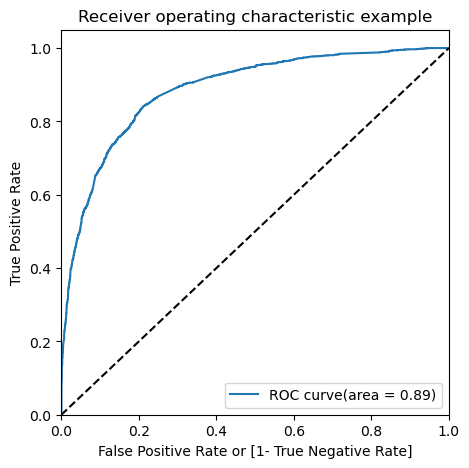

In [158]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Area under the ROC curve is 0.89. That shows our model is good

### To find the Optimal Cut off Point

To find the optimal cut off as previously we have taken 0.5 as a random cut off

In [159]:
# To Create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.172266,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.247452,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.197621,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.865969,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.635022,7987,1,1,1,1,1,1,1,1,0,0,0


In [160]:
# Creating a dataframe to see the values of accuracy, sensitivity and specificity at different values of probability cut offs
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy,sensi,speci]
print(cutoff_df)    

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.609038  0.972200  0.381562
0.2   0.2  0.754999  0.906787  0.659923
0.3   0.3  0.806645  0.844235  0.783099
0.4   0.4  0.811526  0.771872  0.836364
0.5   0.5  0.815462  0.706051  0.883995
0.6   0.6  0.799559  0.597711  0.925992
0.7   0.7  0.782239  0.513083  0.950832
0.8   0.8  0.761140  0.428863  0.969270
0.9   0.9  0.713116  0.275552  0.987196


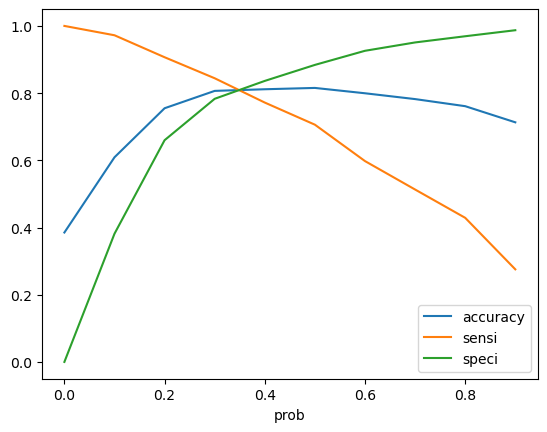

In [161]:
# To plot accuracy, sensitivity and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above graph 0.35 is the optimal cutoff

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1  if x >0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.172266,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.247452,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.197621,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.865969,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.635022,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [163]:
# TO check the overall accuracy
print("Accuracy:", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy: 0.8154621319477248


In [164]:
# Confusion Matrix
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion1

array([[3452,  453],
       [ 719, 1727]], dtype=int64)

In [165]:
TP = confusion1[1,1] # true positives
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [166]:
#  Sensitivity of Logistic regression model
print('Sensitivity:', TP/(TP+FN))

Sensitivity: 0.7060506950122649


In [167]:
# Specificity of Logistic Regression model
print('Specificity:', TN/(TN+FP))

Specificity: 0.8839948783610756


In [168]:
# False Positive rate
print('False positive Rate:', FP/(TN+FP))

False positive Rate: 0.11600512163892446


In [169]:
# Positive Predictive value
print('Positive Predictive Value:', TP/(TP+FP))

Positive Predictive Value: 0.7922018348623853


In [170]:
# Negative Predictive Value
print('Negative Predictive Value:', TN/ (TN+FN))

Negative Predictive Value: 0.8276192759530089


## Precision and Recall

In [171]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3452,  453],
       [ 719, 1727]], dtype=int64)

In [172]:
# Precision

print('Precision:', confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision: 0.7922018348623853


In [173]:
# Recall
print('Recall:', confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall: 0.7060506950122649


In [174]:
from sklearn.metrics import precision_score, recall_score

In [175]:
print('Precision:', precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Precision: 0.7922018348623853


In [176]:
print('Recall:', recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Recall: 0.7060506950122649


### Precision and Recall tradeoff

In [177]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [178]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

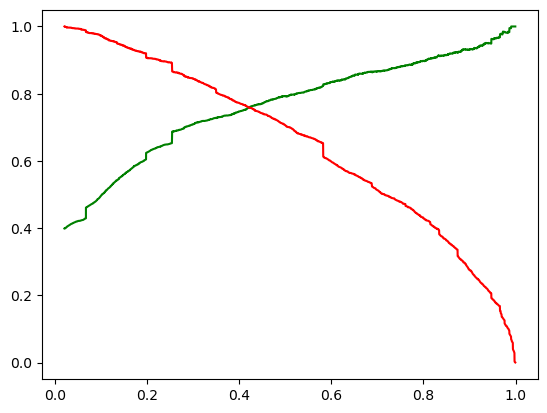

In [179]:
# Precision and recall tradeoff curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Above plot is trade off between precision and recall

## Making Predictions on the test set

Scaling the test data

In [180]:
X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])

Assigning the columns to X_test from final model

In [181]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Unsubscribed,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Opened,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3271,0,-0.600595,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1490,0,1.887326,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
7936,0,-0.752879,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4216,0,-0.888650,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3830,0,-0.587751,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Adding constant

In [182]:
X_test_sm = sm.add_constant(X_test)

In [183]:
# Test set predictions
y_test_pred = result.predict(X_test_sm)
y_test_pred[:10]

3271    0.113380
1490    0.967774
7936    0.097288
4216    0.834023
3830    0.145851
1800    0.712126
6507    0.438468
4821    0.272439
4223    0.947316
4714    0.197621
dtype: float64

In [184]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.113380
1490,0.967774
7936,0.097288
4216,0.834023
3830,0.145851


#### y_test to dataframe

In [185]:
y_test_df = pd.DataFrame(y_test)

In [186]:
y_test_df['Prospect ID'] = y_test_df.index

In [187]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [188]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis = 1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.113380
1,1,1490,0.967774
2,0,7936,0.097288
3,1,4216,0.834023
4,0,3830,0.145851


In [189]:
y_pred_final = y_pred_final.rename(columns={0: 'Conversion_prob'})
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob
0,0,3271,0.113380
1,1,1490,0.967774
2,0,7936,0.097288
3,1,4216,0.834023
4,0,3830,0.145851


In [190]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_prob.map(lambda x : 1 if x>0.35 else 0)

In [191]:
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob,final_predicted
0,0,3271,0.113380,0
1,1,1490,0.967774,1
2,0,7936,0.097288,0
3,1,4216,0.834023,1
4,0,3830,0.145851,0


In [192]:
# Checking on overall accuracy
print("Accuracy:", metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy: 0.8042600073448403


In [193]:
# confusion matrix
confusion2= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1412,  322],
       [ 211,  778]], dtype=int64)

In [194]:
TP = confusion2[1,1] # true positives
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [195]:
print('Sensitivity:', TP/(TP+FN))

Sensitivity: 0.7866531850353893


In [196]:
print('Specificity:', TN/(TN+FP))

Specificity: 0.8143021914648212


## Assinging Lead score to Testing data

In [197]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_prob.map(lambda x: round(x*100))
y_pred_final.head()

,Converted,Prospect ID,Conversion_prob,final_predicted,Lead_Score
0,0,3271,0.113380,0,11
1,1,1490,0.967774,1,97
2,0,7936,0.097288,0,10
3,1,4216,0.834023,1,83
4,0,3830,0.145851,0,15


## Outcomes:

# Train data V/s Test data values:

Train Data: 
    
    Accuracy: 81.5%
    Sensitivity: 70.6%
    Specificity: 88.39%
    
Test Data :

      Accuracy: 80.42%
    Sensitivity: 80.33%
    Specificity: 81.17%


### *As a result our target of lead conversion rate is around 80% . The model seems to predict the conversion rate very well*

### To make a list of leads to be contacted:

The leads whose Lead_Score is greater than or equal to 85 are to be called as 'Top Leads'

In [198]:
top_leads = y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
top_leads

,Converted,Prospect ID,Conversion_prob,final_predicted,Lead_Score
1,1,1490,0.967774,1,97
8,1,4223,0.947316,1,95
16,1,1946,0.876230,1,88
21,1,2461,0.994067,1,99
23,1,5822,0.997573,1,100
...,...,...,...,...,...
2694,1,1566,0.964660,1,96
2699,1,6461,0.923988,1,92
2703,1,5741,0.909440,1,91
2715,1,6299,0.852780,1,85


###  * We can notice that there are 361 Top leads who are likely to be converted. And below are the Prospect ID of the leads to be contacted*

In [199]:
print(" Prospect ID of customers who should be contacted are:")

top_leads_ids = top_leads["Prospect ID"].values.reshape(-1)
top_leads_ids


 Prospect ID of customers who should be contacted are:


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 7347, 2504, 7674, 8596, 4003, 4963, 6947,
       4807,  446,  789, 8372, 5805, 3758,  337, 1561,  737, 9034, 6423,
       8286, 4047, 7174, 4461, 1436, 7552, 5173, 3932, 4080, 1475, 5785,
       2860, 7253, 4297, 5490, 1995,  999, 4498, 5797, 8687, 7653,   76,
       3307, 4208, 3976, 5769, 4978, 1663, 3288, 6557, 8959, 7521, 6177,
       8282, 8213, 9063, 5292, 6913, 1481,  785, 2985, 3265, 3285, 7433,
       3858, 8106,  373, 3055, 7417, 4179, 8568, 7268, 6784, 6754, 7236,
       2960, 7753, 3983,  802, 8745, 4717,  505, 8509, 6094, 4992, 7036,
       2680, 7065,  112, 6149, 7175, 1675, 6999, 5932, 5826, 8492, 6499,
       3439, 4612, 7129, 4793, 2495, 3739,  822, 2378, 5075,  855, 7699,
       5638, 8077, 2727,  720, 2961, 1542, 5656, 2630, 6728, 8205, 6332,
       8461, 5135, 2427, 5087,  174, 2674, 8065, 1568, 8597, 4865, 4708,
       1304, 6066, 6538, 5700, 1388, 5815, 7970, 79

## Notable features from final model

In [200]:
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                            4.790112
Last Activity_Had a Phone Conversation                  2.893827
What is your current occupation_Working Professional    2.671854
Lead Source_Reference                                   2.558157
Last Notable Activity_Unreachable                       1.930723
Last Notable Activity_Email Bounced                     1.865118
Last Notable Activity_SMS Sent                          1.732386
Last Activity_Unsubscribed                              1.372479
Total Time Spent on Website                             1.123292
Last Notable Activity_Email Opened                      0.322879
const                                                   0.054468
Specialization_Others                                  -0.457484
Last Activity_Converted to Lead                        -1.015218
Last Activity_Olark Chat Conversation                  -1.231285
Lead Source_Google                                     -1.301888
Last Activity_Email Bounc

## Recommendations:

**Likely leads:**

1. X Education should contact the leads coming from lead sources : 'Welingak Website' and 'Reference'. They are more likely to get converted.

2. X Education should contact the leads who are Working Professional, as they are more likely to get converted.

3. X Education should contact the leads whose Last Notable Activity is SMS Sent, as they are more likely to get converted.

4. X Education should contact the leads who spend most of the time on Website, as they are more likely to get converted.

5. X Education should contact the leads whose Last Notable Activity is Email Opened, as they are likely to get converted.

6. X Education should contact the leads whose Last Activity_Had a Phone Conversation, as they are likely to get converted.

**Not Likely leads:**

1. X Education should not contact the leads whose Specialization are others, as they are not likely to get converted.

2. X Education should not contact the leads whose Last Activity is Olark Chat Conversation , as they are not likely to get converted.

3. X Education should not contact the leads whose lead sources are :'Google', 'Organic Search','Referral Sites','Direct Traffic', as they are not likely to get converted.

4. X Education should not contact the leads who selected the option for 'Do Not Email' as 'Yes', as they are not likely to get converted.
